In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from datetime import datetime

# 코드 정리

In [ ]:
customer_df = pd.read_csv("/content/drive/MyDrive/kdt-data-33/pjt-1 (개인)/raw data/Customer_info.csv")
discount_df = pd.read_csv("/content/drive/MyDrive/kdt-data-33/pjt-1 (개인)/raw data/Discount_info.csv")
marketing_df = pd.read_csv("/content/drive/MyDrive/kdt-data-33/pjt-1 (개인)/raw data/Marketing_info.csv")
onlinesales_df = pd.read_csv("/content/drive/MyDrive/kdt-data-33/pjt-1 (개인)/raw data/Onlinesales_info.csv")
tax_df = pd.read_csv("/content/drive/MyDrive/kdt-data-33/pjt-1 (개인)/raw data/Tax_info.csv")

In [ ]:
customer_df.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [ ]:
marketing_df.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [ ]:
onlinesales_df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [ ]:
discount_df

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [ ]:
tax_df.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [ ]:
# onlinesales - tax 머지
onlinesales_tax_df = pd.merge(onlinesales_df, tax_df, on="제품카테고리", how="left")
onlinesales_tax_df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,0.10
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,0.18
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,0.18
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,0.10
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,0.18
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,0.10
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,0.10


In [ ]:
# 거래날짜 타입 변환, 월 컬럼 생성
onlinesales_tax_df['거래날짜'] = pd.to_datetime(onlinesales_tax_df['거래날짜'])
onlinesales_tax_df['월'] = onlinesales_tax_df['거래날짜'].dt.month.astype('str')
onlinesales_tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객ID    52924 non-null  object        
 1   거래ID    52924 non-null  object        
 2   거래날짜    52924 non-null  datetime64[ns]
 3   제품ID    52924 non-null  object        
 4   제품카테고리  52924 non-null  object        
 5   수량      52924 non-null  int64         
 6   평균금액    52924 non-null  float64       
 7   배송료     52924 non-null  float64       
 8   쿠폰상태    52924 non-null  object        
 9   GST     52924 non-null  float64       
 10  월       52924 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 4.4+ MB


In [ ]:
discount_df['월'].unique()

array(['1', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'], dtype=object)

In [ ]:
# 월 변환
discount_df.loc[discount_df['월'] == 'Jan', '월'] = '1'
discount_df.loc[discount_df['월'] == 'Feb', '월'] = '2'
discount_df.loc[discount_df['월'] == 'Mar', '월'] = '3'
discount_df.loc[discount_df['월'] == 'Apr', '월'] = '4'
discount_df.loc[discount_df['월'] == 'May', '월'] = '5'
discount_df.loc[discount_df['월'] == 'Jun', '월'] = '6'
discount_df.loc[discount_df['월'] == 'Jul', '월'] = '7'
discount_df.loc[discount_df['월'] == 'Aug', '월'] = '8'
discount_df.loc[discount_df['월'] == 'Sep', '월'] = '9'
discount_df.loc[discount_df['월'] == 'Oct', '월'] = '10'
discount_df.loc[discount_df['월'] == 'Nov', '월'] = '11'
discount_df.loc[discount_df['월'] == 'Dec', '월'] = '12'
discount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
onlinesales_tax_discount_df = pd.merge(onlinesales_tax_df, discount_df, on=["제품카테고리","월"], how="left")
onlinesales_tax_discount_df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10,1,ELEC10,10.0
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10,1,ELEC10,10.0
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,0.10,1,OFF10,10.0
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,0.18,1,SALE10,10.0
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,0.18,1,AIO10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,0.10,12,ELEC30,30.0
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,0.18,12,SALE30,30.0
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,0.10,12,ELEC30,30.0
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,0.10,12,ELEC30,30.0


In [ ]:
df = pd.merge(onlinesales_tax_discount_df, customer_df, on="고객ID", how="left")
df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10,1,ELEC10,10.0,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10,1,ELEC10,10.0,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,0.10,1,OFF10,10.0,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,0.18,1,SALE10,10.0,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,0.18,1,AIO10,10.0,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,0.10,12,ELEC30,30.0,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,0.18,12,SALE30,30.0,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,0.10,12,ELEC30,30.0,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,0.10,12,ELEC30,30.0,여,California,7


In [ ]:
# merge를 위한 onlinesales_df['거래날짜'] 컬럼 타입 변환
onlinesales_df['거래날짜'] = pd.to_datetime(onlinesales_tax_df['거래날짜'])
onlinesales_df['월'] = onlinesales_df['거래날짜'].dt.month.astype('str')
# merge를 위한 discount_df['월'] 컬럼 값 변경
discount_df.loc[discount_df['월'] == 'Jan', '월'] = '1'
# 데이터셋 병합
onlinesales_tax_df = pd.merge(onlinesales_df, tax_df, on="제품카테고리", how="left")
onlinesales_tax_discount_df = pd.merge(onlinesales_tax_df, discount_df, on=["제품카테고리","월"], how="left")
df = pd.merge(onlinesales_tax_discount_df, customer_df, on="고객ID", how="left")

In [ ]:
# 행이나 열 데이터가 모두 nan인 경우에만 제거
df = df.dropna(axis=0, how='all')
# 결측값 색인
mask = df['쿠폰코드'].isna()
df.loc[mask, :]
# 결측값 채우기
df['쿠폰코드'] = df['쿠폰코드'].fillna(0)
df['할인율'] = df['할인율'].fillna(0)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간


In [ ]:
# 부가세 컬럼 생성
df['부가세'] = df['수량'] * df['평균금액'] * df['GST']
# 소비자부담가격 컬럼 생성
df['판매가격'] = df['수량'] * df['평균금액'] * (1 - df['할인율']*0.01)
# 소비자가격 컬럼 생성
df['소비자가격'] = df['판매가격'] + df['부가세'] + df['배송료']
df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,월,쿠폰코드,할인율,성별,고객지역,가입기간,판매가격,부가세,소비자가격
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10,1,ELEC10,10.0,남,Chicago,12,138.339,15.3710,160.2100
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10,1,ELEC10,10.0,남,Chicago,12,138.339,15.3710,160.2100
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,0.10,1,OFF10,10.0,남,Chicago,12,1.845,0.2050,8.5500
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,0.18,1,SALE10,10.0,남,Chicago,12,78.885,15.7770,101.1620
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,0.18,1,AIO10,10.0,남,Chicago,12,14.850,2.9700,24.3200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,0.10,12,ELEC30,30.0,여,New York,45,84.910,12.1300,103.5400
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,0.18,12,SALE30,30.0,여,New York,45,34.244,8.8056,49.5496
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,0.10,12,ELEC30,30.0,여,New York,45,106.316,15.1880,128.0040
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,0.10,12,ELEC30,30.0,여,California,7,281.820,40.2600,328.5800


In [ ]:
# RFM 적용
customer_rfm_df = df.groupby('고객ID').agg({
    "거래날짜": "max",
    "거래ID": "count",
    "소비자가격": "sum"
})

customer_rfm_df['거래날짜'] = datetime(2020, 1, 1) - customer_rfm_df['거래날짜']
customer_rfm_df['거래날짜'] = customer_rfm_df['거래날짜'].apply(lambda x : x.days + 1)

customer_rfm_df = customer_rfm_df.rename(
    columns = {
        "거래날짜": "Recency",
        "거래ID": "Frequency",
        "소비자가격": "Monetary"
})

customer_rfm_df

,Recency,Frequency,Monetary
고객ID,,,
USER_0000,109,2,176.3912
USER_0001,61,60,12686.0760
USER_0002,75,23,1543.2528
USER_0003,19,17,1228.1932
USER_0004,109,36,1798.9788
...,...,...,...
USER_1463,272,7,821.2152
USER_1464,89,40,2709.4316
USER_1465,196,8,157.9924


# 원천 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 데이콘 제공 데이터셋을 병합한 원천 데이터
all_cluster= pd.read_csv("/content/drive/MyDrive/kdt-data-33/pjt-1/dacon-raw-data/dacon_dataset.csv")
all_cluster

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,2019-01,...,0.10,ELEC10,10.0,1,153.71,15.3710,175.5810,1,138.339,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,2019-01,...,0.10,ELEC10,10.0,1,153.71,15.3710,175.5810,1,138.339,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2019-01,...,0.10,OFF10,10.0,1,2.05,0.2050,8.7550,1,1.845,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,2019-01,...,0.18,SALE10,10.0,1,87.65,15.7770,109.9270,0,87.650,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,2019-01,...,0.18,AIO10,10.0,1,16.50,2.9700,25.9700,1,14.850,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,2019-12,...,0.10,ELEC30,30.0,2,121.30,12.1300,139.9300,0,121.300,121.30
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,2019-12,...,0.18,SALE30,30.0,2,48.92,8.8056,64.2256,1,34.244,48.92
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,2019-12,...,0.10,ELEC30,30.0,2,151.88,15.1880,173.5680,1,106.316,151.88
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,2019-12,...,0.10,ELEC30,30.0,2,402.60,40.2600,449.3600,0,402.600,402.60


In [ ]:
all_cluster.columns

Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태',
       '기준연월', '월', '성별', '고객지역', 'GST', '쿠폰코드', '할인율', 'cluster_number',
       '구매가격', '부가세', '소비자부담가격', '쿠폰사용라벨링', 'monetary', '쿠폰 미적용 비용'],
      dtype='object')

In [ ]:
pd.read_csv("/content/drive/MyDrive/kdt-data-33/pjt-1/dacon-raw-data/Onlinesales_info.csv")

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


# 1장 Cluster2 데이터 프레임 생성

## Cluster2 데이터 분리

In [ ]:
cluster_2 = all_cluster.loc[all_cluster['cluster_number'] == 2]
cluster_2 = cluster_2.reset_index()
cluster_2 = cluster_2.drop("index", axis=1)

In [ ]:
cluster_2

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
0,USER_0190,Transaction_0003,2019-01-01,Product_0914,Office,52,0.98,6.50,Used,2019-01,...,0.10,OFF10,10.0,2,50.96,5.0960,62.5560,1,45.864,50.96
1,USER_0190,Transaction_0003,2019-01-01,Product_0966,Office,31,1.99,6.50,Clicked,2019-01,...,0.10,OFF10,10.0,2,61.69,6.1690,74.3590,0,61.690,61.69
2,USER_0190,Transaction_0003,2019-01-01,Product_0970,Office,31,1.99,6.50,Clicked,2019-01,...,0.10,OFF10,10.0,2,61.69,6.1690,74.3590,0,61.690,61.69
3,USER_0190,Transaction_0003,2019-01-01,Product_1025,Apparel,5,17.53,6.50,Used,2019-01,...,0.18,SALE10,10.0,2,87.65,15.7770,109.9270,1,78.885,87.65
4,USER_0190,Transaction_0004,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Clicked,2019-01,...,0.10,ELEC10,10.0,2,245.54,24.5540,276.5940,0,245.540,245.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25867,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,2019-12,...,0.10,ELEC30,30.0,2,121.30,12.1300,139.9300,0,121.300,121.30
25868,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,2019-12,...,0.18,SALE30,30.0,2,48.92,8.8056,64.2256,1,34.244,48.92
25869,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,2019-12,...,0.10,ELEC30,30.0,2,151.88,15.1880,173.5680,1,106.316,151.88
25870,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,2019-12,...,0.10,ELEC30,30.0,2,402.60,40.2600,449.3600,0,402.600,402.60


## 소비자부담가격 데이터 프레임 추가 생성

### 코드

In [ ]:
## 소비자 부담 가격 컬럼을 포함한 데이터 프레임 생성 ##

# 클러스터2에서 고유한 고객ID & 거래ID 피벗 테이블 생성
cluster_2_total_price = pd.pivot_table(
    cluster_2,
    index = ["고객ID",  "거래ID"]
)
cluster_2_total_price = cluster_2_total_price.drop(["GST", "cluster_number", "monetary","부가세", "수량",  "쿠폰사용라벨링", "평균금액", "할인율"], axis=1)
cluster_2_total_price = cluster_2_total_price.reset_index()
cluster_2_total_price.head(3)

,고객ID,거래ID,구매가격,배송료,소비자부담가격,월,쿠폰 미적용 비용
0,USER_0001,Transaction_20178,5.59,20.85,27.3506,11,5.59
1,USER_0001,Transaction_20179,9.18,6.00,16.8324,11,9.18
2,USER_0001,Transaction_20180,149.00,6.00,169.9000,11,149.00


In [ ]:
# 클러스터2에서 고유한 고객ID & 거래ID monetary, 부가세 총합 그루핑
gb1 = cluster_2.groupby(["고객ID", "거래ID"])[["monetary", "부가세"]].sum()
gb1 = gb1.reset_index()
gb1.head(3)

,고객ID,거래ID,monetary,부가세
0,USER_0001,Transaction_20178,10.702,1.8212
1,USER_0001,Transaction_20179,18.360,3.3048
2,USER_0001,Transaction_20180,149.000,14.9000


In [ ]:
cluster_2_total_price = pd.merge(cluster_2_total_price, gb1, on=["고객ID", "거래ID"])
cluster_2_total_price.head(3)

,고객ID,거래ID,구매가격,배송료,소비자부담가격,월,쿠폰 미적용 비용,monetary,부가세
0,USER_0001,Transaction_20178,5.59,20.85,27.3506,11,5.59,10.702,1.8212
1,USER_0001,Transaction_20179,9.18,6.00,16.8324,11,9.18,18.360,3.3048
2,USER_0001,Transaction_20180,149.00,6.00,169.9000,11,149.00,149.000,14.9000


In [ ]:
# 소비자부담가격 컬럼 추가
cluster_2_total_price["소비자부담가격"] = cluster_2_total_price["배송료"] + cluster_2_total_price["부가세"]
# 소비자총부담가격 컬럼 추가
cluster_2_total_price["소비자총부담가격"] = cluster_2_total_price["monetary"] + cluster_2_total_price["배송료"] + cluster_2_total_price["부가세"]

In [ ]:
# 고유 고객ID별 고객지역 데이터프레임 분리
gb_reg = cluster_2[["고객ID","고객지역"]]
gb_reg = gb_reg.drop_duplicates(["고객ID"])

# 고객지역 컬럼 병합
cluster_2_total_price = pd.merge(cluster_2_total_price, gb_reg, on=["고객ID"])
cluster_2_total_price = cluster_2_total_price[["고객ID", "거래ID", "고객지역", "monetary", "월", "배송료", "부가세", "소비자부담가격", "소비자총부담가격"]]

### 결과

In [ ]:
cluster_2_total_price.head(3)

,고객ID,거래ID,고객지역,monetary,월,배송료,부가세,소비자부담가격,소비자총부담가격
0,USER_0001,Transaction_20178,New York,10.702,11,20.85,1.8212,22.6712,33.3732
1,USER_0001,Transaction_20179,New York,18.360,11,6.00,3.3048,9.3048,27.6648
2,USER_0001,Transaction_20180,New York,149.000,11,6.00,14.9000,20.9000,169.9000


In [ ]:
cluster_2_total_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 13553
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객ID      13554 non-null  object 
 1   거래ID      13554 non-null  object 
 2   고객지역      13554 non-null  object 
 3   monetary  13554 non-null  float64
 4   월         13554 non-null  int64  
 5   배송료       13554 non-null  float64
 6   부가세       13554 non-null  float64
 7   소비자부담가격   13554 non-null  float64
 8   소비자총부담가격  13554 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.0+ MB


In [ ]:
cluster_2.columns

Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태',
       '기준연월', '월', '성별', '고객지역', 'GST', '쿠폰코드', '할인율', 'cluster_number',
       '구매가격', '부가세', '소비자부담가격', '쿠폰사용라벨링', 'monetary', '쿠폰 미적용 비용'],
      dtype='object')

In [ ]:
cluster_2_total_price.columns

Index(['고객ID', '거래ID', '고객지역', 'monetary', '월', '배송료', '부가세', '소비자부담가격',
       '소비자총부담가격'],
      dtype='object')

In [ ]:
cluster_2["고객ID"].nunique(), cluster_2_total_price["고객ID"].nunique()

(599, 599)

## 재구매자 라벨링 데이터프레임 추가 생성

### 코드

In [ ]:
reorder_pt = cluster_2.pivot_table(index = "고객ID", columns = "거래날짜", values="거래ID", aggfunc="count")
reorder_pt = reorder_pt.fillna(0)
reorder_pt.head(3)

거래날짜,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-09,2019-01-10,2019-01-11,2019-01-12,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
고객ID,,,,,,,,,,,,,,,,,,,,,
USER_0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
USER_0002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
USER_0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
U = len(reorder_pt.index)
reorder_cnt = []
for i in range(U):
  row = reorder_pt.iloc[i]
  r = row.values
  cnt = 0
  for num in r:
    if cnt >= 2:
      break
    elif num >= 1:
      cnt += 1
    elif num == 0:
      continue
  if cnt == 2:
    cnt = 1
    reorder_cnt.append(cnt)
  elif cnt == 1:
    cnt = 0
    reorder_cnt.append(cnt)

len(reorder_cnt)

599

In [ ]:
# 재구매자 라벨링 컬럼 추가
reorder_pt["재구매자 라벨링"] = reorder_cnt
reorder_pt = reorder_pt.reset_index()
reorder_df = reorder_pt.copy()
reorder_df = reorder_df[["고객ID", "재구매자 라벨링"]]

### 결과

In [ ]:
reorder_all_df = pd.DataFrame({"고객ID":cluster_2["고객ID"].unique()})
reorder_all_df = pd.merge(reorder_all_df, reorder_df, on="고객ID")
reorder_all_df.head(3)

,고객ID,재구매자 라벨링
0,USER_0190,1
1,USER_0730,1
2,USER_0585,1


# 지역별 데이터 프레임 생성

## 지역별 데이터 분리

In [ ]:
Chicago_2_cluster = cluster_2.loc[cluster_2["고객지역"] == "Chicago"]
California_2_cluster = cluster_2.loc[cluster_2["고객지역"] == "California"]
NewJersey_2_cluster = cluster_2.loc[cluster_2["고객지역"] == "New Jersey"]
NewYork_2_cluster = cluster_2.loc[cluster_2["고객지역"] == "New York"]
WashingtonDC_2_cluster = cluster_2.loc[cluster_2["고객지역"] == "Washington DC"]

## 지역별 구매횟수 확인

In [ ]:
cluster_2_region_order_cnt = cluster_2.pivot_table(index="고객지역", values="거래ID", aggfunc=len)
cluster_2_region_order_cnt.sort_values(by='거래ID', ascending=False)

,거래ID
고객지역,
Chicago,8874
California,7613
New York,5555
New Jersey,2166
Washington DC,1664


## 지역별 고객수 확인

In [ ]:
cluster_2_region_user = pd.DataFrame({
    "고객지역" : ["California", "Chicago", "New York", "New Jersey", "Washington DC"],
    "고객ID" : [ cluster_2[cluster_2["고객지역"] == "California"]["고객ID"].nunique(),
              cluster_2[cluster_2["고객지역"] == "Chicago"]["고객ID"].nunique(),
               cluster_2[cluster_2["고객지역"] == "New York"]["고객ID"].nunique(),
               cluster_2[cluster_2["고객지역"] == "New Jersey"]["고객ID"].nunique(),
               cluster_2[cluster_2["고객지역"] == "Washington DC"]["고객ID"].nunique()]
    })
cluster_2_region_user

,고객지역,고객ID
0,California,179
1,Chicago,191
2,New York,128
3,New Jersey,62
4,Washington DC,39


## 품목별 주문횟수 확인

In [ ]:
cluster_2_category_order_cnt = cluster_2.pivot_table(index="제품카테고리", values="거래ID", aggfunc=len)
cluster_2_category_order_cnt.sort_values(by="거래ID", ascending=False).head(3)

,거래ID
제품카테고리,
Apparel,8287
Nest-USA,7154
Office,3030


# 2장 Cluster2 데이터 분석

# 지역별 고객ID와 재구매

## 1-1. 시카고

### 1-1-1. 월별 구매분석

##### (1) 월별 전체 구매율 비교
- 월별 구매금액 / 전체금액 * 100

In [ ]:
chic_2_purchase_amt = cluster_2_total_price[cluster_2_total_price["고객지역"]=="Chicago"].groupby("고객지역")["소비자총부담가격"].agg([
    ("전체 구매금액" , sum)
])

l = []
for i in range(1, cluster_2_total_price["월"].nunique() + 1 ):
  month = cluster_2_total_price[cluster_2_total_price["월"] == i ]

  r1 = month[month["고객지역"] == "Chicago"]
  r1_s = r1["소비자총부담가격"].sum()
  l.append(r1_s)

  chic_2_purchase_amt[f"{i}"] = l
  l = []

In [ ]:
chic_2_purchase_amt

,전체 구매금액,1,2,3,4,5,6,7,8,9,10,11,12
고객지역,,,,,,,,,,,,,
Chicago,908269.0836,24587.2867,40035.4273,36126.7024,26632.7855,36272.6634,45680.2916,51417.7246,84904.7425,76149.4963,137980.3537,183022.1703,165459.4393


In [ ]:
chic_2_purchase_ratio = pd.DataFrame(index = ["Chicago"])

for i in range(1, cluster_2_total_price["월"].nunique()+1):
  p = chic_2_purchase_amt[f"{i}"]
  chic_2_purchase_ratio[f"{i}"] = p / chic_2_purchase_amt["전체 구매금액"] * 100

In [ ]:
chic_2_purchase_ratio

,1,2,3,4,5,6,7,8,9,10,11,12
Chicago,2.707049,4.407882,3.977533,2.932257,3.993603,5.029379,5.661067,9.347972,8.384024,15.191572,20.150655,18.217007


###### 시각화

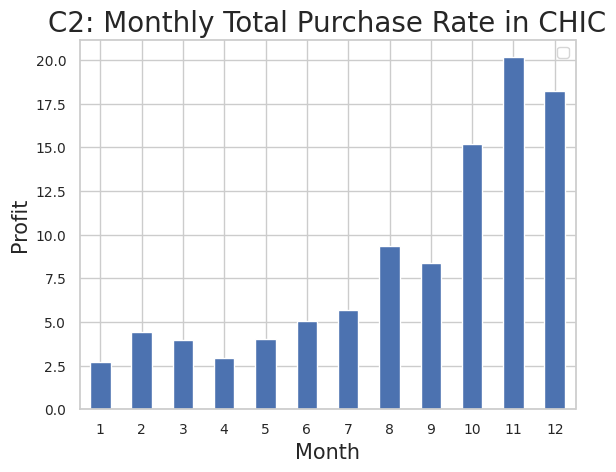

In [ ]:
chic_2_purchase_ratio.T.plot.bar()

plt.title("C2: Monthly Total Purchase Rate in CHIC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

###### 분석 정리

- 구매금액 기준 전반적으로 연말까지 쭉 상승세, 11월에 가장 최고점
- 카테고리별 월간 구매율 확인 필요, 시즈널 이슈 예상


#### (2) 주문횟수로 본 월별 구매율
- 월별 주문횟수(거래ID) / 전체 구매횟수 * 100

###### 시각화

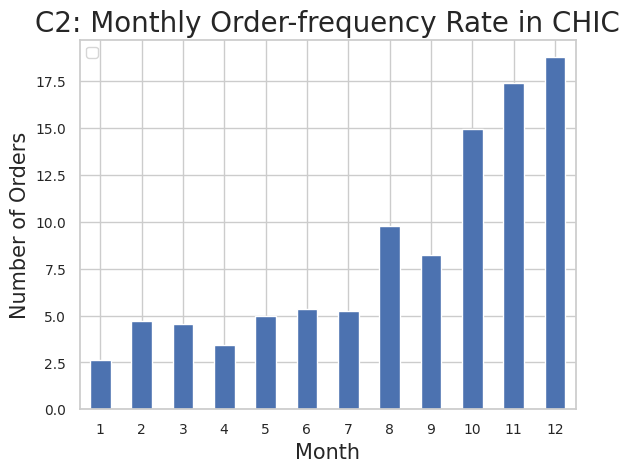

In [ ]:
def Chicago_2_cluster_order(x):
  mask = Chicago_2_cluster['월'] == x
  data = Chicago_2_cluster[mask]['거래ID'].nunique() / Chicago_2_cluster['거래ID'].nunique() * 100
  return round(data, 2)

Chicago_2_cluster_order_all = [Chicago_2_cluster_order(month) for month in range(1, 13)]
Chicago_2_cluster_order_all_df = pd.DataFrame(Chicago_2_cluster_order_all, index=(i for i in range(1,13)))
Chicago_2_cluster_order_all_df

Chicago_2_cluster_order_all_df.transpose().T.plot.bar()

plt.title("C2: Monthly Order-frequency Rate in CHIC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

###### 분석 정리
- 월별 전체 구매율과 동일한 추이를 보이고 있으나, 12월에 구매금액 대비 높은 주문횟수 기록
- 꾸준한 상승추이를 보이다 9월에 주문횟수 하락하는 모습

#### (3) 한달 내 재구매율
- 재구매율 용어 정리 <br>
Y = "다음 달에도 재구매한 사용자 수" <br>
ratio = "다음 달에도 재구매한 비율" <br>
total = "해당 월 주문횟수"

In [ ]:
chicago_re = Chicago_2_cluster[["기준연월", "고객ID"]].drop_duplicates(keep="first")
chicago_re.head(3)

,기준연월,고객ID
61,2019-01,USER_1267
85,2019-01,USER_0281
96,2019-01,USER_0783


In [ ]:
loop_list = list(chicago_re['기준연월'].unique())
chic_cluster_2_re_all = []

for i in loop_list:
  c2_left = chicago_re[chicago_re['기준연월'] == i]
  bsym_2m = (pd.to_datetime(i) + pd.DateOffset(months=1)).strftime('%Y-%m')  # 2019-01 + 1달 -> 2019-02 를 string 타입으로 변경
  c2_right = pd.DataFrame(chicago_re[chicago_re['기준연월'] == bsym_2m]['고객ID'].unique())  # 데이터프레임
  c2_right['target'] = 1
  c2_right.columns= ['고객ID', 'target']
  c2_merge = pd.merge(c2_left, c2_right, how='left')
  c2_merge['target'] = c2_merge['target'].fillna(0)

  chic_cluster_2_re_all.append(c2_merge)

chic_cluster_2_re_all = pd.concat(chic_cluster_2_re_all)

In [ ]:
chic_repurchase_2 = chic_cluster_2_re_all.groupby('기준연월')['target'].agg(['sum', 'count']).reset_index()
chic_repurchase_2.columns = ['기준연월', 'Y', 'Total']
chic_repurchase_2['ratio'] = chic_repurchase_2['Y']/chic_repurchase_2['Total']
chic_repurchase_2 = chic_repurchase_2.iloc[0:11, :]
round(chic_repurchase_2, 2)

,기준연월,Y,Total,ratio
0,2019-01,0.0,15,0.00
1,2019-02,1.0,15,0.07
2,2019-03,1.0,15,0.07
3,2019-04,1.0,17,0.06
4,2019-05,6.0,25,0.24
5,2019-06,12.0,33,0.36
6,2019-07,7.0,30,0.23
7,2019-08,5.0,35,0.14
8,2019-09,4.0,30,0.13
9,2019-10,6.0,62,0.10


###### 시각화

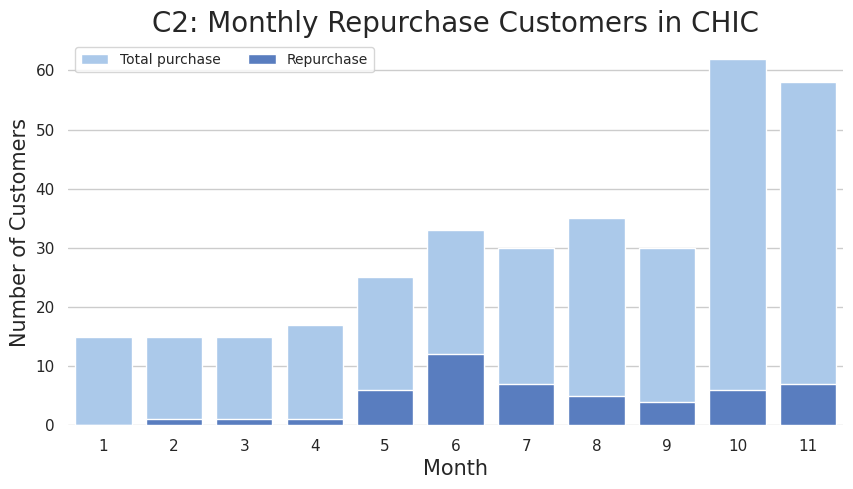

In [ ]:
chic_repurchase_2['기준연월'] = [i for i in range(1, 12)]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')

sns.barplot(x='기준연월',
            y='Total',
            data=chic_repurchase_2,
            label='Total purchase',
            color='b')

sns.set_color_codes('muted')
sns.barplot(x='기준연월',
            y='Y',
            data=chic_repurchase_2,
            label='Repurchase',
            color='b')

axes.set_title("C2: Monthly Repurchase Customers in CHIC", fontsize='20')
axes.set_xlabel('Month', fontsize='15')
axes.set_ylabel('Number of Customers', fontsize='15')

axes.legend(ncol=2, frameon=True, fontsize=10)
sns.despine(left=True, bottom=True)

###### 분석 정리

- 내달에도 재구매한 비율 3순위: 7월 36% 6월 24% 8월 23%
- 전체 구매율과 달리 재구매율은 여름 시즌에 높은 수준을 기록
- 여름 시즌의 커머스 내 잦은 반복 구매 => 소비재의 높은 판매량이 있었을 것으로 판단

#### (4) 전체 기간의 재구매자 비율
- 재구매자 / 전체 고객수 * 100

In [ ]:
chi_order_cnt_df = pd.pivot_table(Chicago_2_cluster,
               index= "고객ID",
               columns = "거래날짜",
               values = "거래ID",
               aggfunc = "count"
               )
chi_order_cnt_df = chi_order_cnt_df.fillna(0)

In [ ]:
N = len(chi_order_cnt_df.index)
re = []
for i in range(N):
  row = chi_order_cnt_df.iloc[i]
  r = row.values
  cnt = 0
  for num in r:
    if cnt >= 2 :
      break
    elif num >= 1 :
      cnt += 1
    elif num == 0:
      continue

  if cnt == 2:
    cnt = 1
    re.append(cnt)
  elif cnt == 1:
    cnt = 0
    re.append(cnt)

cago_2_re_ratio = sum(re) /N * 100
print("chicago 재구매자 비율 : ", round(cago_2_re_ratio, 2))

chicago 재구매자 비율 :  65.45


###### 시각화

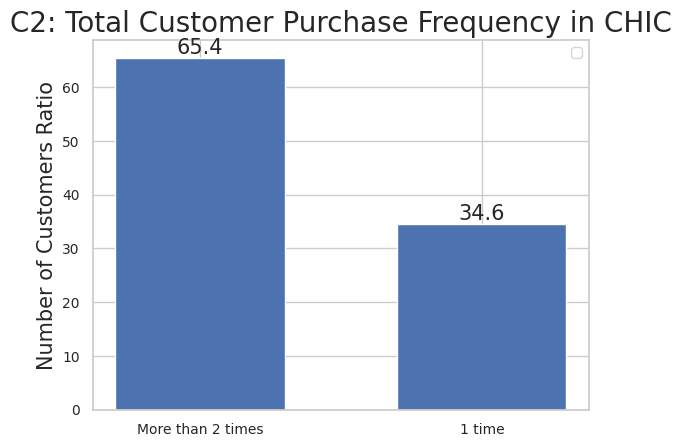

In [ ]:
x = ["More than 2 times", "1 time"]
y = [cago_2_re_ratio, 100- cago_2_re_ratio]
bar = plt.bar(x,y,width=0.6)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 15)

plt.title("C2: Total Customer Purchase Frequency in CHIC", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Customers Ratio', fontsize=15)
plt.legend("", fontsize=10)

plt.show()


###### 분석 정리
- 1년간 2회 이상 구매 비율: 65.4%

### 1-1-2. 선호 품목

##### 주문수량 기준

In [ ]:
chic_categ_quant_top5_index = Chicago_2_cluster.groupby("제품카테고리")["수량"].sum().sort_values(ascending = False).index[:5]
chic_categ_quant_top5_df = Chicago_2_cluster[Chicago_2_cluster["제품카테고리"].isin(chic_categ_quant_top5_index)]

chic_categ_quant_top5_pt = pd.pivot_table(
    chic_categ_quant_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "수량",
    aggfunc = "sum"
)

chic_categ_quant_top5_pt.head(3)

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,116,237,8,133,374
2019-02,186,363,98,190,677
2019-03,253,349,213,145,638


###### 시각화

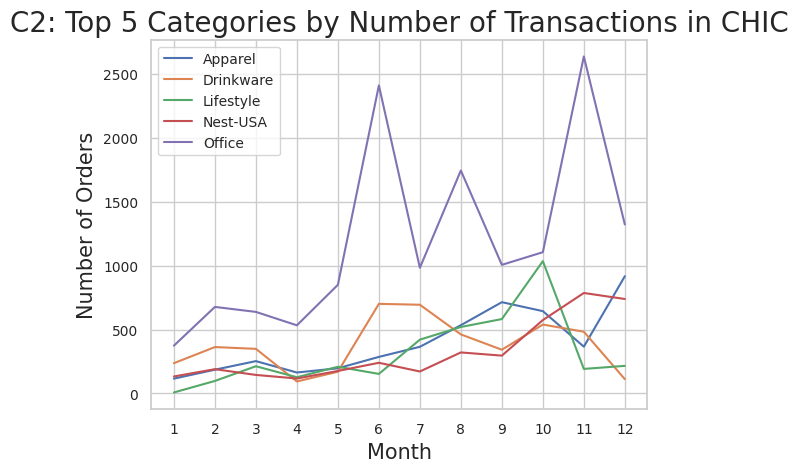

In [ ]:
for col in chic_categ_quant_top5_pt.columns:
  plt.plot([i for i in range(1,13)], chic_categ_quant_top5_pt[col], label = col)

plt.title("C2: Top 5 Categories by Number of Transactions in CHIC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1,13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

###### 분석 정리

- 대체적으로 Office 카테고리의 주문 수량이 월등히 높으며, 특히 6월 8월 11월에 월등한 수준 기록
- 여름 시즌에 office와 drinkware가 평균적으로 많은 주문 수량을 확보
- office는 한번에 다량 구매되는 저가형 제품으로 예상되기에, drinkware가 매출에 기여했을 것으로 분석

##### 주문횟수 기준

In [ ]:
chic_categ_ordercnt_top5_index = Chicago_2_cluster.groupby("제품카테고리")["거래ID"].count().sort_values(ascending=False).index[:5]
chic_categ_ordercnt_top5_df = Chicago_2_cluster[Chicago_2_cluster["제품카테고리"].isin(chic_categ_ordercnt_top5_index)]

chic_categ_ordercnt_top5_pt = pd.pivot_table(
    chic_categ_ordercnt_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "거래ID",
    aggfunc = "count"
).fillna(0)

###### 시각화

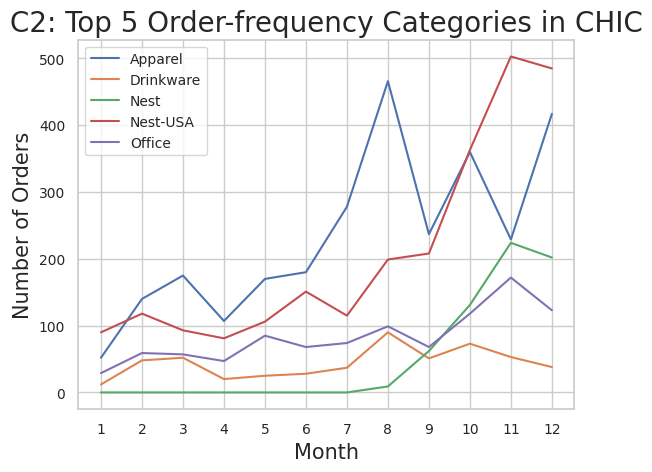

In [ ]:
for col in chic_categ_ordercnt_top5_pt.columns:
  plt.plot([i for i in range(1, 13)], chic_categ_ordercnt_top5_pt[col], label=col)

plt.title("C2: Top 5 Order-frequency Categories in CHIC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1, 13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

###### 분석 정리

- apparel이 8월, nest-usa가 11월에 유독 높은 주문횟수 기록
- 특히 nest-usa는 연초에서 연말까지 쭉 상승세
- nest는 7월까지 구매 전무, 8월부터 구매 기록이 확인되어 8월 런칭 품목으로 예상
- 여름과 연말에 높은 커머스 방문율이 주문으로 이어졌을 것으로 분석
- Nest-USA의 주문 횟수가 연말에 가장 높은 것으로 볼 때, 주문 수량이 많았던 Office 품목은 한번에 다량 구매, Nest-USA와 apparel은 한번에 소량으로 다수 구매된 것으로 분석


##### 주문금액 기준

###### 시각화

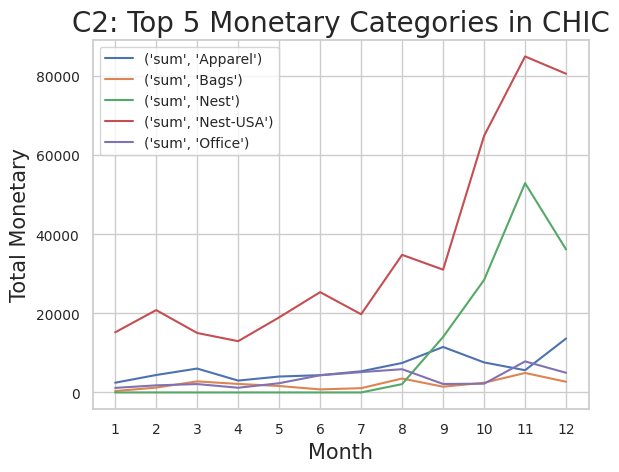

In [ ]:
chic_categ_monetary_top5_index = Chicago_2_cluster.groupby("제품카테고리")["monetary"].sum().sort_values(ascending=False).index[:5]
chic_categ_monetary_top5_df = Chicago_2_cluster[Chicago_2_cluster["제품카테고리"].isin(chic_categ_monetary_top5_index)]

chic_categ_monetary_top5_pt = pd.pivot_table(
    chic_categ_monetary_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "monetary",
    aggfunc = [np.sum]
).fillna(0)


for col in chic_categ_monetary_top5_pt.columns:
  plt.plot([i for i in range(1, 13)], chic_categ_monetary_top5_pt[col], label=col)

plt.title("C2: Top 5 Monetary Categories in CHIC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Total Monetary", fontsize=15)
plt.xticks([i for i in range(1, 13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

### 1-1-3. 카테고리별 쿠폰 사용

In [ ]:
chic_categ_ordercnt_top5_df.head(3)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
61,USER_1267,Transaction_0117,2019-01-03,Product_0981,Nest-USA,1,153.71,6.5,Used,2019-01,...,0.10,ELEC10,10.0,2,153.71,15.3710,175.5810,1,138.339,153.71
62,USER_1267,Transaction_0118,2019-01-03,Product_0181,Drinkware,1,10.72,6.5,Clicked,2019-01,...,0.18,EXTRA10,10.0,2,10.72,1.9296,19.1496,0,10.720,10.72
64,USER_1267,Transaction_0119,2019-01-03,Product_0981,Nest-USA,1,153.71,6.5,Used,2019-01,...,0.10,ELEC10,10.0,2,153.71,15.3710,175.5810,1,138.339,153.71


###### 시각화

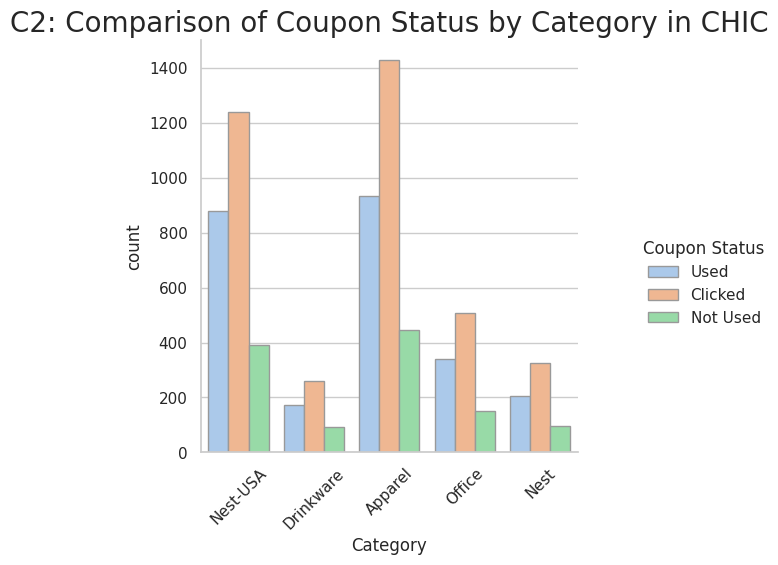

In [ ]:
g = sns.catplot(x='제품카테고리', hue='쿠폰상태', kind ='count', palette='pastel', edgecolor=".6",data=chic_categ_ordercnt_top5_df)

# 글자 크기 조정
mpl.rcParams['axes.titlesize']  = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
g._legend.set_title('Coupon Status')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.title('C2: Comparison of Coupon Status by Category in CHIC')
plt.show()

###### 분석 정리

- Apparel 품목에서 높은 쿠폰 사용량 보였으나 동시에 다른 품목 대비 클릭만 한 수치 또한 상당하여 높은 쿠폰 사용 - 클릭 수 차이
- 한번에 소량 구매가 다수 였던 Nest-USA와 apparel 품목이 쿠폰 사용 및 클릭 상위권에 위치한 것으로 보아 특정 금액 이상만 쿠폰 사용 가능했던 것으로 분석

## 1-2. 캘리포니아

### 1-2-1. 월별 구매분석

#### (1) 월별 전체 구매율 비교

In [ ]:
cali_2_purchase_amt = cluster_2_total_price[cluster_2_total_price["고객지역"]=="California"].groupby("고객지역")["소비자총부담가격"].agg([
    ("전체 구매금액" , sum)
])

l = []
for i in range(1, cluster_2_total_price["월"].nunique() + 1 ):
  month = cluster_2_total_price[cluster_2_total_price["월"] == i ]

  r1 = month[month["고객지역"] == "California"]
  r1_s = r1["소비자총부담가격"].sum()
  l.append(r1_s)

  cali_2_purchase_amt[f"{i}"] = l
  l = []

In [ ]:
cali_2_purchase_amt

,전체 구매금액,1,2,3,4,5,6,7,8,9,10,11,12
고객지역,,,,,,,,,,,,,
California,803033.5806,42535.6123,30005.7273,25232.2788,49662.7574,24182.5599,46653.2845,56052.8762,41966.5092,84370.9843,116525.9719,141967.4386,143877.5802


In [ ]:
cali_2_purchase_ratio = pd.DataFrame(index = ["California"])

for i in range(1, cluster_2_total_price["월"].nunique()+1):
  p = cali_2_purchase_amt[f"{i}"]
  cali_2_purchase_ratio[f"{i}"] = p / cali_2_purchase_amt["전체 구매금액"] * 100

In [ ]:
cali_2_purchase_ratio

,1,2,3,4,5,6,7,8,9,10,11,12
California,5.296866,3.736547,3.14212,6.184394,3.011401,5.809631,6.980141,5.225997,10.506533,14.510722,17.678892,17.916758


###### 시각화

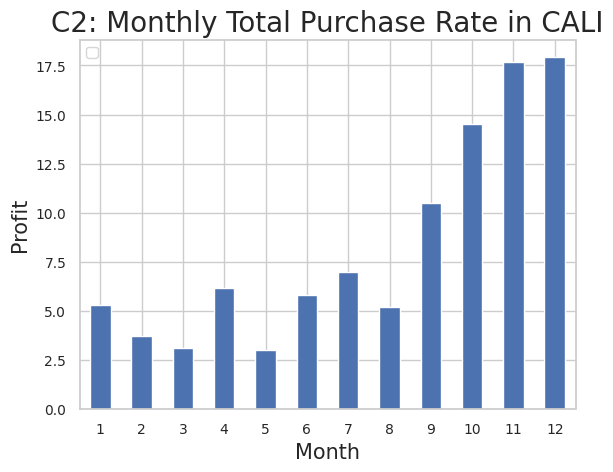

In [ ]:
cali_2_purchase_ratio.T.plot.bar()

plt.title("C2: Monthly Total Purchase Rate in CALI", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

###### 분석 정리

- 대체적으로 봄부터 겨울까지 무난한 상승 추이를 보이나, 5월 8월에 잠시 구매금액 하락
- 커머스의 시즈널 이슈 예상


#### (2) 주문횟수로 본 월별 구매율

###### 시각화

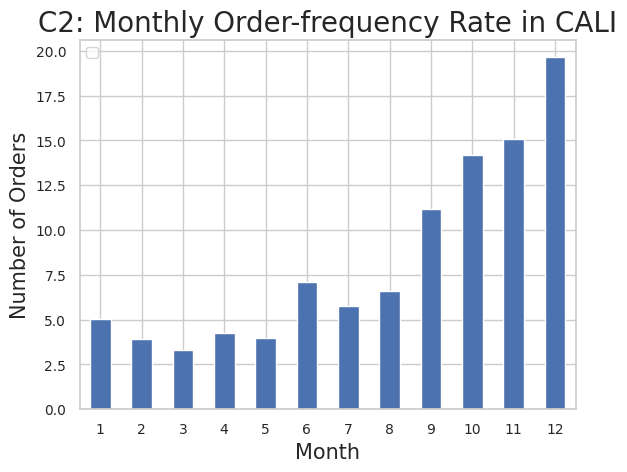

In [ ]:
def California_2_cluster_order(x):
  mask = California_2_cluster['월'] == x
  data = California_2_cluster[mask]['거래ID'].nunique() / California_2_cluster['거래ID'].nunique() * 100
  return round(data, 2)

California_2_cluster_order_all = [California_2_cluster_order(month) for month in range(1, 13)]
California_2_cluster_order_all_df = pd.DataFrame(California_2_cluster_order_all, index=(i for i in range(1,13)))
California_2_cluster_order_all_df.transpose().T.plot.bar()

plt.title("C2: Monthly Order-frequency Rate in CALI", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

###### 분석 정리

- 월별 전체 구매율과 유사한 추이, 8월은 주문횟수는 전달 대비 상승 추이인 것으로 보아 주문횟수가 많고 소량 구매된 것으로 예상


#### (3) 한달 내 재구매율

In [ ]:
california_re = California_2_cluster[["기준연월", "고객ID"]].drop_duplicates(keep="first")
california_re.head(3)

,기준연월,고객ID
0,2019-01,USER_0190
17,2019-01,USER_0730
38,2019-01,USER_0541


In [ ]:
loop_list = list(california_re['기준연월'].unique())
calif_cluster_2_re_all = []

for i in loop_list:
  c2_left = california_re[california_re['기준연월'] == i]
  bsym_2m = (pd.to_datetime(i) + pd.DateOffset(months=1)).strftime('%Y-%m')
  c2_right = pd.DataFrame(california_re[california_re['기준연월'] == bsym_2m]['고객ID'].unique())
  c2_right['target'] = 1
  c2_right.columns= ['고객ID', 'target']
  c2_merge = pd.merge(c2_left, c2_right, how='left')
  c2_merge['target'] = c2_merge['target'].fillna(0)

  calif_cluster_2_re_all.append(c2_merge)

calif_cluster_2_re_all = pd.concat(calif_cluster_2_re_all)

In [ ]:
calif_repurchase = calif_cluster_2_re_all.groupby('기준연월')['target'].agg(['sum', 'count']).reset_index()
calif_repurchase.columns = ['기준연월', 'Y', 'Total']
calif_repurchase['ratio'] = calif_repurchase['Y']/calif_repurchase['Total']
calif_repurchase = calif_repurchase.iloc[0:11, :]
round(calif_repurchase, 2)

,기준연월,Y,Total,ratio
0,2019-01,2.0,21,0.10
1,2019-02,0.0,10,0.00
2,2019-03,3.0,15,0.20
3,2019-04,3.0,15,0.20
4,2019-05,6.0,15,0.40
5,2019-06,15.0,32,0.47
6,2019-07,15.0,29,0.52
7,2019-08,10.0,33,0.30
8,2019-09,9.0,38,0.24
9,2019-10,7.0,59,0.12


###### 시각화

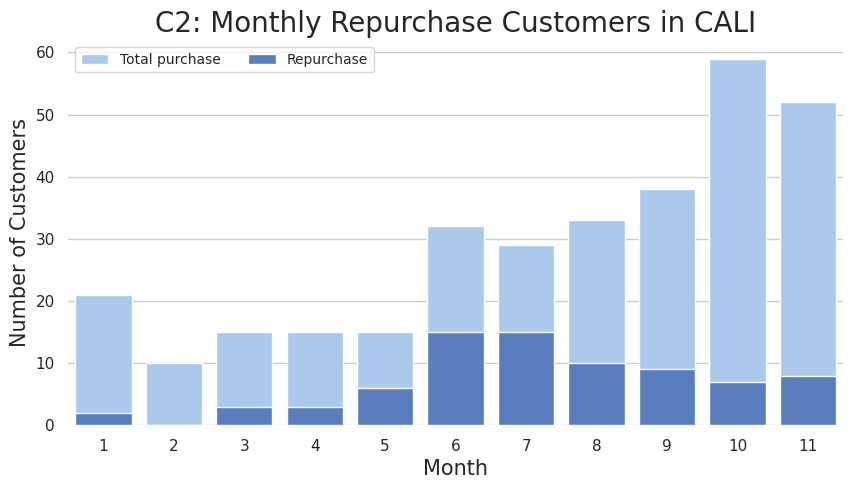

In [ ]:
calif_repurchase['기준연월'] = [i for i in range(1, 12)]
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')

sns.barplot(x='기준연월',
            y='Total',
            data=calif_repurchase,
            label='Total purchase',
            color='b')

sns.set_color_codes('muted')
sns.barplot(x='기준연월',
            y='Y',
            data=calif_repurchase,
            label='Repurchase',
            color='b')

axes.set_title("C2: Monthly Repurchase Customers in CALI", fontsize='20')
axes.set_xlabel('Month', fontsize='15')
axes.set_ylabel('Number of Customers', fontsize='15')
axes.legend(ncol=2, frameon=True, fontsize=10)
sns.despine(left=True, bottom=True)

###### 분석 정리

- 내달에도 재구매한 비율 3순위: 8월 52% 7월 47% 6월 40%
- 시카고와 캘리포니아의 유사한 구매 패턴 확인 = 여름 시즌에 재구매율 증가 + 연말 구매율 증가
- 여름에 구매주기가 짧은 물품의 판매가 연속으로 이루어졌고, 겨울에 구매주기가 긴 물품의 판매가 이루어진 것으로 분석
- 연말 고객의 전체 구매금액에서 차지하는 비중이 크므로, 구매주기가 긴 물품의 집중 판매 전략 필요한 것으로 분석

#### (4) 전체 기간의 재구매자 비율

In [ ]:
California_2_cluster = cluster_2.loc[cluster_2["고객지역"] == "California"]

cal_reorder_cnt_df = pd.pivot_table(California_2_cluster,
               index= "고객ID",
               columns = "거래날짜",
               values = "거래ID",
               aggfunc = "count"
               )
cal_reorder_cnt_df = cal_reorder_cnt_df.fillna(0)


N = len(cal_reorder_cnt_df.index)
re = []
for i in range(N):
  row = cal_reorder_cnt_df.iloc[i]
  r = row.values
  cnt = 0
  for num in r:
    if cnt >= 2 :
      break
    elif num >= 1 :
      cnt += 1
    elif num == 0:
      continue

  if cnt == 2:
    cnt = 1
    re.append(cnt)
  elif cnt == 1:
    cnt = 0
    re.append(cnt)

ca_2_re_ratio = sum(re) /N * 100
print("california 재구매율 : ", round(ca_2_re_ratio, 2))

california 재구매율 :  60.34


###### 시각화

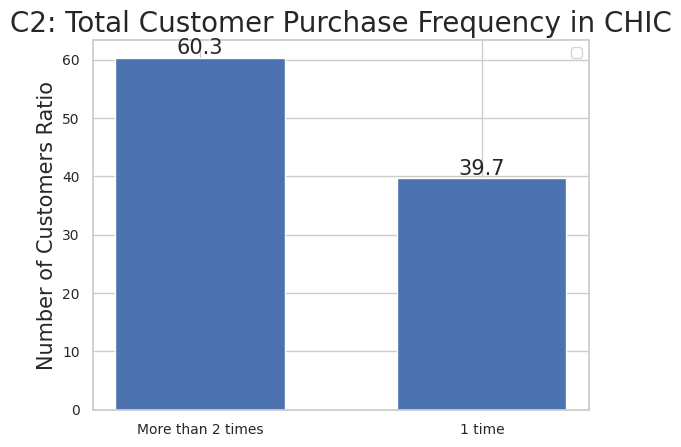

In [ ]:
x = ["More than 2 times", "1 time"]
y = [ca_2_re_ratio, 100- ca_2_re_ratio]
bar = plt.bar(x,y,width=0.6)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 15)

plt.title("C2: Total Customer Purchase Frequency in CHIC", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Customers Ratio', fontsize=15)
plt.legend("", fontsize=10)

plt.show()


###### 분석 정리

- 1년간 2회 이상 구매한 사람의 비율: 60.3%


### 1-2-2. 선호 품목

##### 주문수량 기준

In [ ]:
cali_categ_quant_top5_index = California_2_cluster.groupby("제품카테고리")["수량"].sum().sort_values(ascending = False).index[:5]
cali_categ_quant_top5_df = California_2_cluster[California_2_cluster["제품카테고리"].isin(cali_categ_quant_top5_index)]

cali_categ_quant_top5_pt = pd.pivot_table(
    cali_categ_quant_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "수량",
    aggfunc = "sum"
)

cali_categ_quant_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,157,219,240,175,1315
2019-02,169,168,134,115,561
2019-03,124,332,164,122,462
2019-04,568,470,204,172,249
2019-05,149,311,130,117,503
2019-06,387,448,148,218,586
2019-07,786,229,332,163,462
2019-08,415,275,136,176,734
2019-09,451,800,351,287,952


###### 시각화

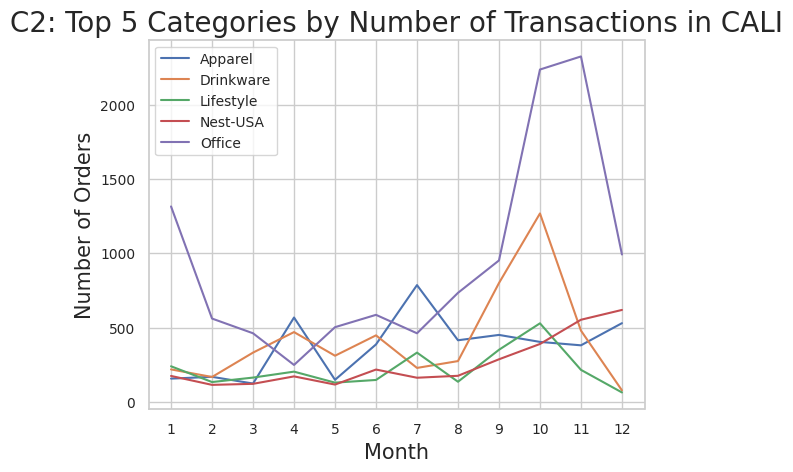

In [ ]:
for col in cali_categ_quant_top5_pt.columns:
  plt.plot([i for i in range(1,13)], cali_categ_quant_top5_pt[col], label = col)

plt.title("C2: Top 5 Categories by Number of Transactions in CALI", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1,13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

###### 분석 정리

- office의 주문 수량이 1월과 10-11월에 많고, drinkware이 10월에 잠시 상승하는 모습


##### 주문횟수 기준

In [ ]:
cali_categ_ordercnt_top5_index = California_2_cluster.groupby("제품카테고리")["거래ID"].count().sort_values(ascending=False).index[:5]

cali_categ_ordercnt_top5_df = California_2_cluster[California_2_cluster["제품카테고리"].isin(cali_categ_ordercnt_top5_index)]

cali_categ_ordercnt_top5_pt = pd.pivot_table(
    cali_categ_ordercnt_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "거래ID",
    aggfunc = "count"
).fillna(0)

###### 시각화

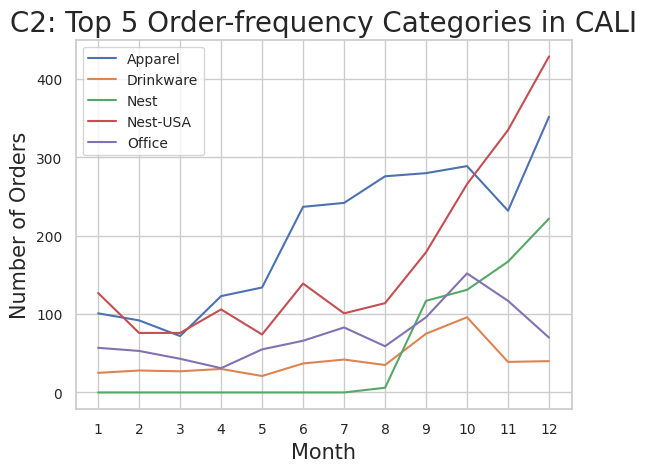

In [ ]:
for col in cali_categ_ordercnt_top5_pt.columns:
  plt.plot([i for i in range(1, 13)], cali_categ_ordercnt_top5_pt[col], label=col)

plt.title("C2: Top 5 Order-frequency Categories in CALI", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1, 13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

###### 분석 정리

- 유난히 연말까지 상승세를 보이는 품목은 nest-usa, apparel, nest
- nest는 7월까지 구매 전무하였으나 8월부터 확인되는 것으로 보아, 8월 런칭 품목으로 예상
- office 한번에 다량구매, apparel nest-usa의 다수에 걸친 소량 구매 확인
- 주문횟수의 경우 대체적으로 모두 연말에 상승세


### 1-2-3. 카테고리별 쿠폰 사용

###### 시각화

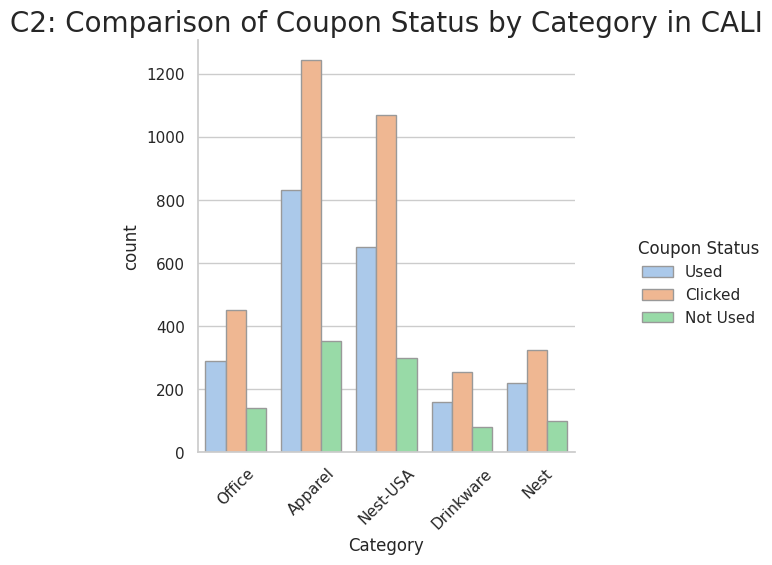

In [ ]:
g = sns.catplot(x='제품카테고리', hue='쿠폰상태', kind ='count', palette='pastel', edgecolor=".6", data=cali_categ_ordercnt_top5_df);

mpl.rcParams['axes.titlesize']  = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
g._legend.set_title('Coupon Status')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.title('C2: Comparison of Coupon Status by Category in CALI')
plt.show()

###### 분석 정리

- apparel과 nest-usa에서 쿠폰을 많이 사용 및 클릭
- 한번에 소량 구매하나 구매금액이 크기 때문에 쿠폰에 대한 관심도도 컸을 것으로 예상

## 1-3. 뉴저지

### 1-3-1. 월별 구매분석

#### (1) 월별 전체 구매율 비교

In [ ]:
nj_2_purchase_amt = cluster_2_total_price[cluster_2_total_price["고객지역"]=="New Jersey"].groupby("고객지역")["소비자총부담가격"].agg([
    ("전체 구매금액" , sum)
])

l = []
for i in range(1, cluster_2_total_price["월"].nunique() + 1 ):
  month = cluster_2_total_price[cluster_2_total_price["월"] == i ]

  r1 = month[month["고객지역"] == "New Jersey"]
  r1_s = r1["소비자총부담가격"].sum()
  l.append(r1_s)

  nj_2_purchase_amt[f"{i}"] = l
  l = []

In [ ]:
nj_2_purchase_amt

,전체 구매금액,1,2,3,4,5,6,7,8,9,10,11,12
고객지역,,,,,,,,,,,,,
New Jersey,243618.2026,10547.8954,15496.5691,3578.5064,25690.1759,14364.8977,11930.6382,12507.7405,4191.8824,6326.9074,44708.9216,45628.3823,48645.6857


In [ ]:
nj_2_purchase_ratio = pd.DataFrame(index = ["New Jersey"])

for i in range(1, cluster_2_total_price["월"].nunique()+1):
  p = nj_2_purchase_amt[f"{i}"]
  nj_2_purchase_ratio[f"{i}"] = p / nj_2_purchase_amt["전체 구매금액"] * 100

In [ ]:
nj_2_purchase_ratio

,1,2,3,4,5,6,7,8,9,10,11,12
New Jersey,4.329683,6.361006,1.468899,10.545261,5.89648,4.897269,5.134157,1.720677,2.597059,18.352045,18.729463,19.968001


###### 시각화

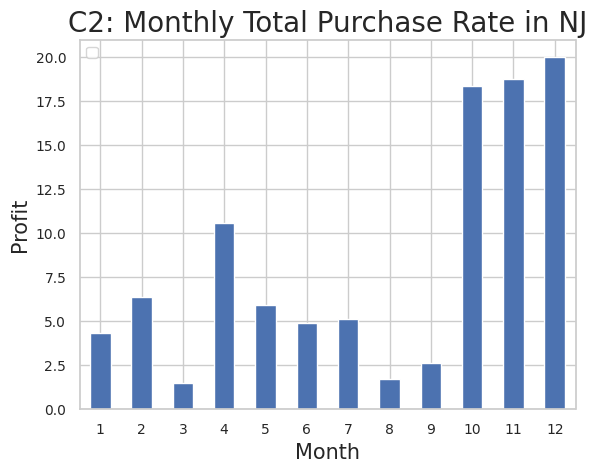

In [ ]:
nj_2_purchase_ratio.T.plot.bar()

plt.title("C2: Monthly Total Purchase Rate in NJ", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

###### 분석 정리

- 타 지역과 동일하게 연말에 높은 구매금액을 보였으나, 보다 여름의 구매금액 비중이 낮았고 4월에 유독 높은 수준 기록


#### (2) 주문횟수로 본 월별 구매율

###### 시각화

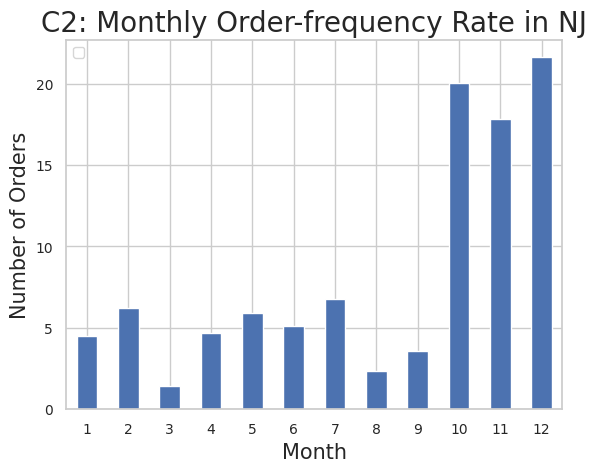

In [ ]:
def NewJersey_2_cluster_order(x):
  mask = NewJersey_2_cluster['월'] == x
  data = NewJersey_2_cluster[mask]['거래ID'].nunique() / NewJersey_2_cluster['거래ID'].nunique() * 100
  return round(data, 2)

NewJersey_2_cluster_order_all = [NewJersey_2_cluster_order(month) for month in range(1, 13)]
NewJersey_2_cluster_order_all_df = pd.DataFrame(NewJersey_2_cluster_order_all, index=(i for i in range(1,13)))
NewJersey_2_cluster_order_all_df.transpose().T.plot.bar()

plt.title("C2: Monthly Order-frequency Rate in NJ", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

###### 분석 정리

- 구매금액은 4월에 높았으나 주문횟수에서는 그렇지 않은 것으로 보아 구매주기가 긴 품목을 4월에 한번에 많은 금액 지출한 것으로 분석


#### (3) 한달 내 재구매율

In [ ]:
newjsy_re = NewJersey_2_cluster[["기준연월", "고객ID"]].drop_duplicates(keep="first")

In [ ]:
loop_list = list(newjsy_re['기준연월'].unique())
newjsy_cluster_2_re_all = []

for i in loop_list:
  c2_left = newjsy_re[newjsy_re['기준연월'] == i]
  bsym_2m = (pd.to_datetime(i) + pd.DateOffset(months=1)).strftime('%Y-%m')
  c2_right = pd.DataFrame(newjsy_re[newjsy_re['기준연월'] == bsym_2m]['고객ID'].unique())
  c2_right['target'] = 1
  c2_right.columns= ['고객ID', 'target']
  c2_merge = pd.merge(c2_left, c2_right, how='left')
  c2_merge['target'] = c2_merge['target'].fillna(0)

  newjsy_cluster_2_re_all.append(c2_merge)

newjsy_cluster_2_re_all = pd.concat(newjsy_cluster_2_re_all)

In [ ]:
newjsy_repurchase = newjsy_cluster_2_re_all.groupby('기준연월')['target'].agg(['sum', 'count']).reset_index()
newjsy_repurchase.columns = ['기준연월', 'Y', 'Total']
newjsy_repurchase['ratio'] = newjsy_repurchase['Y']/newjsy_repurchase['Total']
newjsy_repurchase = newjsy_repurchase.iloc[0:11, :]
round(newjsy_repurchase, 2)

,기준연월,Y,Total,ratio
0,2019-01,2.0,9,0.22
1,2019-02,0.0,4,0.00
2,2019-03,0.0,4,0.00
3,2019-04,2.0,9,0.22
4,2019-05,2.0,9,0.22
5,2019-06,0.0,8,0.00
6,2019-07,1.0,5,0.20
7,2019-08,2.0,8,0.25
8,2019-09,1.0,9,0.11
9,2019-10,3.0,23,0.13


###### 시각화

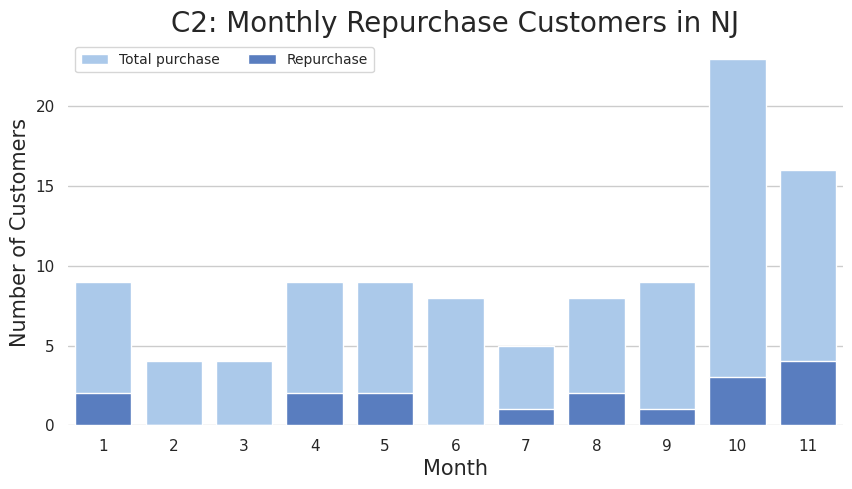

In [ ]:
newjsy_repurchase['기준연월'] = [i for i in range(1, 12)]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')

sns.barplot(x='기준연월',
            y='Total',
            data=newjsy_repurchase,
            label='Total purchase',
            color='b')

sns.set_color_codes('muted')
sns.barplot(x='기준연월',
            y='Y',
            data=newjsy_repurchase,
            label='Repurchase',
            color='b')

axes.set_title("C2: Monthly Repurchase Customers in NJ", fontsize='20')
axes.set_xlabel('Month', fontsize='15')
axes.set_ylabel('Number of Customers', fontsize='15')
axes.legend(ncol=2, frameon=True, fontsize=10)
sns.despine(left=True, bottom=True)

###### 분석 정리


- 내달에도 재구매한 비율 3순위: 9월 12월 25%, 2월 5월 6월 22%, 8월 20%
- 타 지역과 달리 산발적으로 재구매율이 높은 모습 확인


#### (4) 전체기간의 재구매자 비율

In [ ]:
NewJersey_2_cluster = cluster_2.loc[cluster_2["고객지역"] == "New Jersey"]

new_order_cnt_df = pd.pivot_table(NewJersey_2_cluster,
               index= "고객ID",
               columns = "거래날짜",
               values = "거래ID",
               aggfunc = "count"
               )
new_order_cnt_df = new_order_cnt_df.fillna(0)


N = len(new_order_cnt_df.index)
re = []
for i in range(N):
  row = new_order_cnt_df.iloc[i]
  r = row.values
  cnt = 0
  for num in r:
    if cnt >= 2 :
      break
    elif num >= 1 :
      cnt += 1
    elif num == 0:
      continue

  if cnt == 2:
    cnt = 1
    re.append(cnt)
  elif cnt == 1:
    cnt = 0
    re.append(cnt)

nj_2_re_ratio = sum(re) /N * 100
print("new jersey 재구매율 : ", round(nj_2_re_ratio, 2))

new jersey 재구매율 :  67.74


###### 시각화

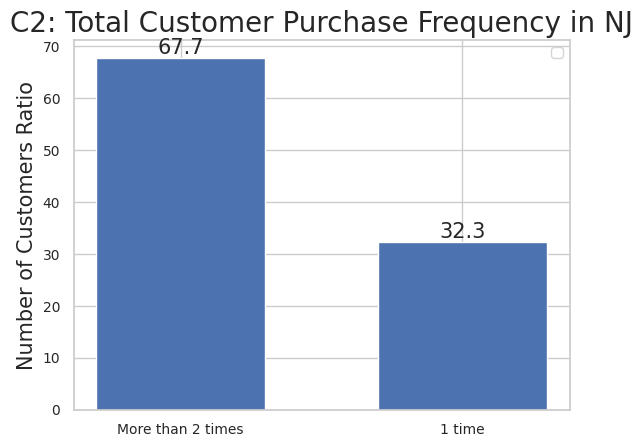

In [ ]:
x = ["More than 2 times", "1 time"]
y = [nj_2_re_ratio, 100- nj_2_re_ratio]
bar = plt.bar(x,y,width=0.6)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 15)

plt.title("C2: Total Customer Purchase Frequency in NJ", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Customers Ratio', fontsize=15)
plt.legend("", fontsize=10)

plt.show()

###### 분석 정리

- 1년간 2회 이상 구매한 고객 비율: 67.7%

### 1-3-2. 선호 품목

##### 주문수량 기준

In [ ]:
nj_categ_quant_top5_index = NewJersey_2_cluster.groupby("제품카테고리")["수량"].sum().sort_values(ascending = False).index[:5]
nj_categ_quant_top5_df = NewJersey_2_cluster[NewJersey_2_cluster["제품카테고리"].isin(nj_categ_quant_top5_index)]

nj_categ_quant_top5_pt = pd.pivot_table(
    nj_categ_quant_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "수량",
    aggfunc = "sum"
)
nj_categ_quant_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,24,85,4,60,96
2019-02,39,93,5,89,203
2019-03,23,5,71,17,100
2019-04,56,5,1119,29,1145
2019-05,182,74,34,53,150
2019-06,58,118,22,50,103
2019-07,111,73,22,65,184
2019-08,29,22,30,24,32
2019-09,78,16,26,32,110


###### 시각화

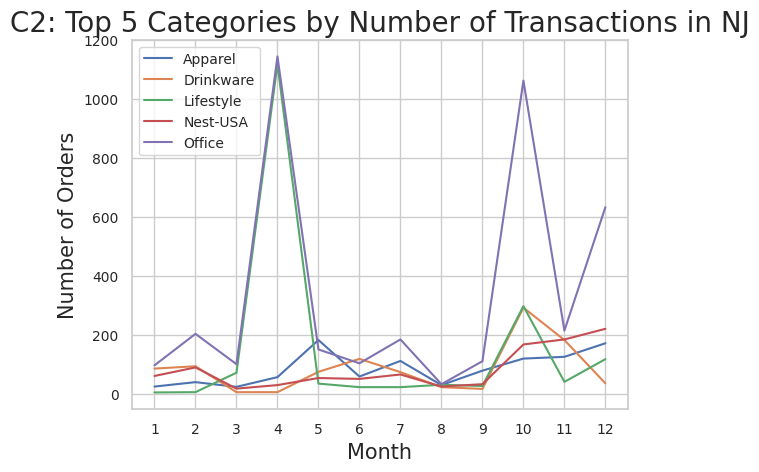

In [ ]:
for col in nj_categ_quant_top5_pt.columns:
  plt.plot([i for i in range(1,13)], nj_categ_quant_top5_pt[col], label = col)

plt.title("C2: Top 5 Categories by Number of Transactions in NJ", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1,13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

###### 분석 정리

- 4월에 office와 lifestyle의 높은 주문 수량 기록
- 특히 10월에 office의 압도적인 주문 수량 확인


##### 주문횟수 기준

In [ ]:
nj_categ_ordercnt_top5_index = NewJersey_2_cluster.groupby("제품카테고리")["거래ID"].count().sort_values(ascending=False).index[:5]

nj_categ_ordercnt_top5_df = NewJersey_2_cluster[NewJersey_2_cluster["제품카테고리"].isin(nj_categ_ordercnt_top5_index)]

nj_categ_ordercnt_top5_pt = pd.pivot_table(
    nj_categ_ordercnt_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "거래ID",
    aggfunc = "count"
).fillna(0)
nj_categ_ordercnt_top5_pt

제품카테고리,Apparel,Drinkware,Nest,Nest-USA,Office
기준연월,,,,,
2019-01,18.0,10.0,0.0,33.0,18.0
2019-02,33.0,14.0,0.0,49.0,18.0
2019-03,18.0,2.0,0.0,10.0,8.0
2019-04,49.0,5.0,0.0,16.0,26.0
2019-05,65.0,13.0,0.0,34.0,12.0
2019-06,50.0,10.0,0.0,34.0,26.0
2019-07,79.0,10.0,0.0,37.0,21.0
2019-08,20.0,12.0,0.0,11.0,10.0
2019-09,37.0,7.0,3.0,18.0,15.0


###### 시각화

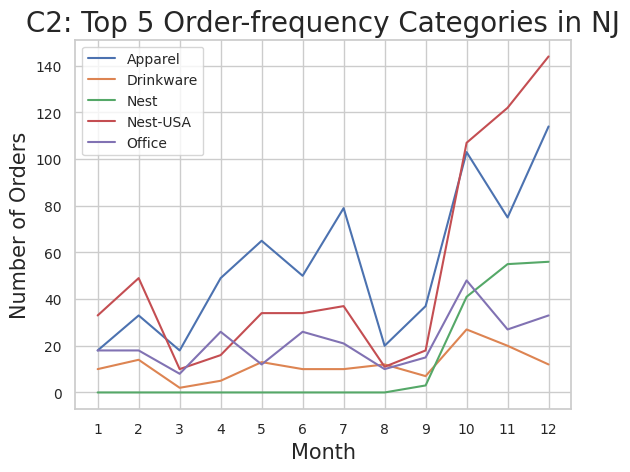

In [ ]:
for col in nj_categ_ordercnt_top5_pt.columns:
  plt.plot([i for i in range(1, 13)], nj_categ_ordercnt_top5_pt[col], label=col)

plt.title("C2: Top 5 Order-frequency Categories in NJ", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1, 13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

###### 분석 정리

- nest-usa와 apparel의 주문횟수가 연말에 급증하였으며 여름 시즌에도 apparel의 높은 주문횟수 확인
- 4월에 주문수량이 높았던 office와 주문횟수가 높지 않고, lifestyle 순위권에도 없는 것으로 보아 주문횟수가 아주 적은, 굉장히 많은 다량 구매가 이루어졌을 것으로 분석
- 해당 지역에서는 nest가 9월부터 주문횟수 확인되어, 뉴저지의 경우 해당 품목의 관심도가 소폭 떨어지거나 늦게 런칭되었을 것으로 예상
- nest의 경우 런칭 이후에 안정적인 수준의 주문횟수를 이끌어가고 있으므로 푸쉬 전략 필요
- nest-usa, apparel은 한번에 소량 구매 추측


##### 주문금액 기준

###### 시각화

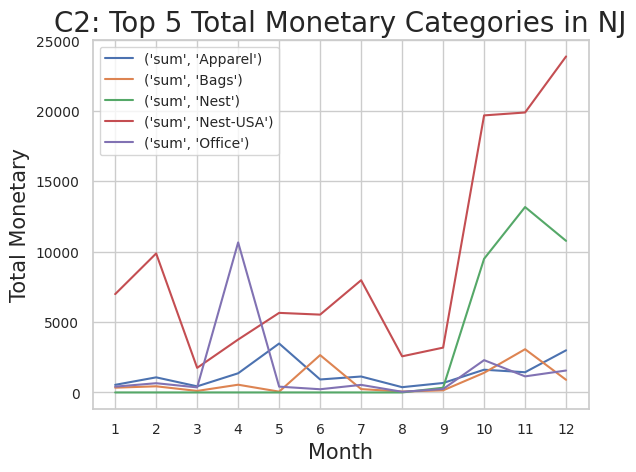

In [ ]:
nj_categ_monetary_top5_index = NewJersey_2_cluster.groupby("제품카테고리")["monetary"].sum().sort_values(ascending=False).index[:5]

nj_categ_monetary_top5_df = NewJersey_2_cluster[NewJersey_2_cluster["제품카테고리"].isin(nj_categ_monetary_top5_index)]

nj_categ_monetary_top5_pt = pd.pivot_table(
    nj_categ_monetary_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "monetary",
    aggfunc = [np.sum]
).fillna(0)
nj_categ_monetary_top5_pt

for col in nj_categ_monetary_top5_pt.columns:
  plt.plot([i for i in range(1, 13)], nj_categ_monetary_top5_pt[col], label=col)

plt.title("C2: Top 5 Total Monetary Categories in NJ", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Total Monetary", fontsize=15)
plt.xticks([i for i in range(1, 13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

### 1-3-3. 카테고리별 쿠폰 사용

###### 시각화

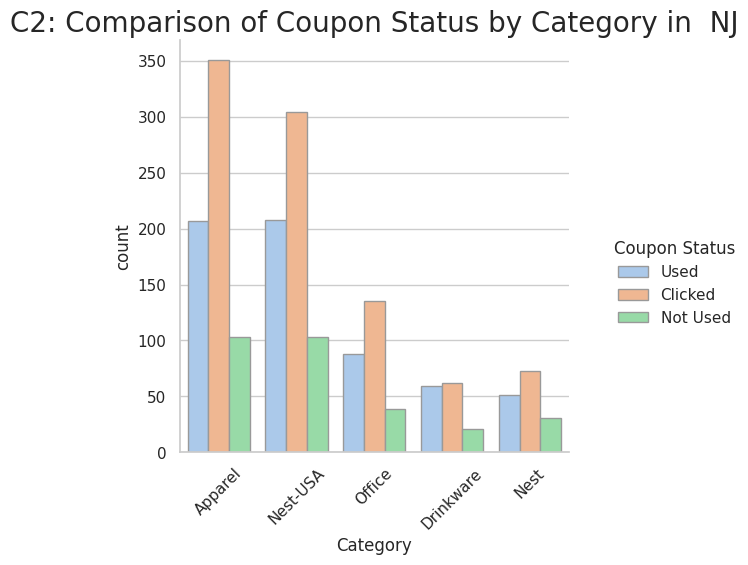

In [ ]:
g = sns.catplot(x='제품카테고리', hue='쿠폰상태', kind ='count', palette='pastel', edgecolor=".6",data=nj_categ_ordercnt_top5_df);

# 글자 크기 조정
mpl.rcParams['axes.titlesize']  = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
g._legend.set_title('Coupon Status')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.title('C2: Comparison of Coupon Status by Category in  NJ')
plt.show()

###### 분석 정리

- 시카고 및 캘리포니아에 비해 현저히 작은 쿠폰 사용 현황을 통해 두 지역 대비 작은 시장 규모 재확인
- nest-usa와 apparel에서 많은 것으로 보아 한번에 소량 구매한 물품이지만 금액대가 있어 쿠폰 관심도 높았던 것으로 분석

## 1-4. 뉴욕

### 1-4-1. 월별 구매 분석

#### (1) 월별 전체 구매율 비교

In [ ]:
ny_2_purchase_amt = cluster_2_total_price[cluster_2_total_price["고객지역"]=="New York"].groupby("고객지역")["소비자총부담가격"].agg([
    ("전체 구매금액" , sum)
])

l = []
for i in range(1, cluster_2_total_price["월"].nunique() + 1 ):
  month = cluster_2_total_price[cluster_2_total_price["월"] == i ]

  r1 = month[month["고객지역"] == "New York"]
  r1_s = r1["소비자총부담가격"].sum()
  l.append(r1_s)

  ny_2_purchase_amt[f"{i}"] = l
  l = []

In [ ]:
ny_2_purchase_amt

,전체 구매금액,1,2,3,4,5,6,7,8,9,10,11,12
고객지역,,,,,,,,,,,,,
New York,553520.2825,16030.8029,7982.2385,41952.8888,20445.5472,38130.5493,28106.5459,20428.2369,40104.3894,33160.2294,108905.0024,120117.7126,78156.1392


In [ ]:
ny_2_purchase_ratio = pd.DataFrame(index = ["New York"])

for i in range(1, cluster_2_total_price["월"].nunique()+1):
  p = ny_2_purchase_amt[f"{i}"]
  ny_2_purchase_ratio[f"{i}"] = p / ny_2_purchase_amt["전체 구매금액"] * 100

In [ ]:
ny_2_purchase_ratio

,1,2,3,4,5,6,7,8,9,10,11,12
New York,2.896155,1.442086,7.579287,3.69373,6.888736,5.077781,3.690603,7.245333,5.990788,19.67498,21.700689,14.119833


###### 시각화

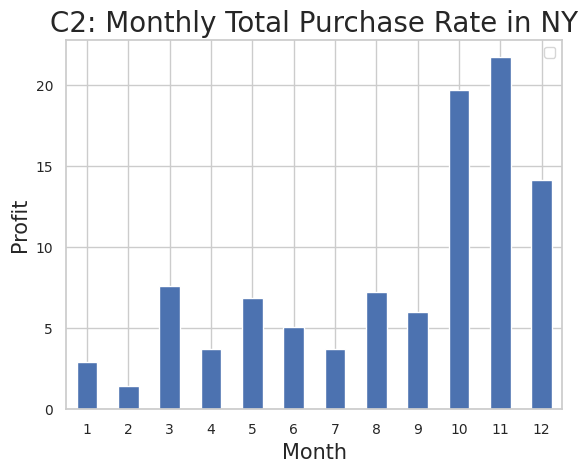

In [ ]:
ny_2_purchase_ratio.T.plot.bar()

plt.title("C2: Monthly Total Purchase Rate in NY", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

###### 분석 정리

- 타 지역과 달리 여름 시즌에 낮고, 타 지역과 동일하게 연말 특히 11월에 최고점 확인

#### (2) 주문횟수로 본 월별 구매율

###### 시각화

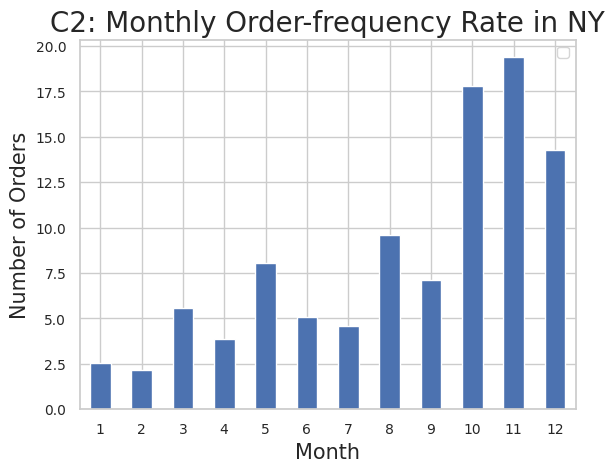

In [ ]:
def NewYork_2_cluster_order(x):
  mask = NewYork_2_cluster['월'] == x
  data = NewYork_2_cluster[mask]['거래ID'].nunique() / NewYork_2_cluster['거래ID'].nunique() * 100
  return round(data, 2)

NewYork_2_cluster_order_all = [NewYork_2_cluster_order(month) for month in range(1, 13)]
NewYork_2_cluster_order_all_df = pd.DataFrame(NewYork_2_cluster_order_all, index=(i for i in range(1,13)))
NewYork_2_cluster_order_all_df.transpose().T.plot.bar()

plt.title("C2: Monthly Order-frequency Rate in NY", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

###### 분석 정리

- 월별 전체 구매율과 동일한 추이
- 타 지역에 비해 산발적으로 구매율 급증, 급락하는 모습
- 연말의 경우 11월>10월>12월 순으로 높은 수준 기록


#### (3) 한달 내 재구매율

In [ ]:
ny_re = NewYork_2_cluster[["기준연월", "고객ID"]].drop_duplicates(keep="first")

In [ ]:
loop_list = list(ny_re['기준연월'].unique())
ny_cluster_2_re_all = []

for i in loop_list:
  c2_left = ny_re[ny_re['기준연월'] == i]
  bsym_2m = (pd.to_datetime(i) + pd.DateOffset(months=1)).strftime('%Y-%m')
  c2_right = pd.DataFrame(ny_re[ny_re['기준연월'] == bsym_2m]['고객ID'].unique())
  c2_right['target'] = 1
  c2_right.columns= ['고객ID', 'target']
  c2_merge = pd.merge(c2_left, c2_right, how='left')
  c2_merge['target'] = c2_merge['target'].fillna(0)

  ny_cluster_2_re_all.append(c2_merge)

ny_cluster_2_re_all = pd.concat(ny_cluster_2_re_all)

In [ ]:
newyork_repurchase = ny_cluster_2_re_all.groupby('기준연월')['target'].agg(['sum', 'count']).reset_index()
newyork_repurchase.columns = ['기준연월', 'Y', 'Total']
newyork_repurchase['ratio'] = newyork_repurchase['Y']/newyork_repurchase['Total']
newyork_repurchase = newyork_repurchase.iloc[0:11, :]
round(newyork_repurchase, 2)

,기준연월,Y,Total,ratio
0,2019-01,0.0,9,0.00
1,2019-02,0.0,6,0.00
2,2019-03,3.0,20,0.15
3,2019-04,4.0,15,0.27
4,2019-05,4.0,23,0.17
5,2019-06,2.0,16,0.12
6,2019-07,7.0,15,0.47
7,2019-08,7.0,30,0.23
8,2019-09,5.0,18,0.28
9,2019-10,8.0,43,0.19


###### 시각화

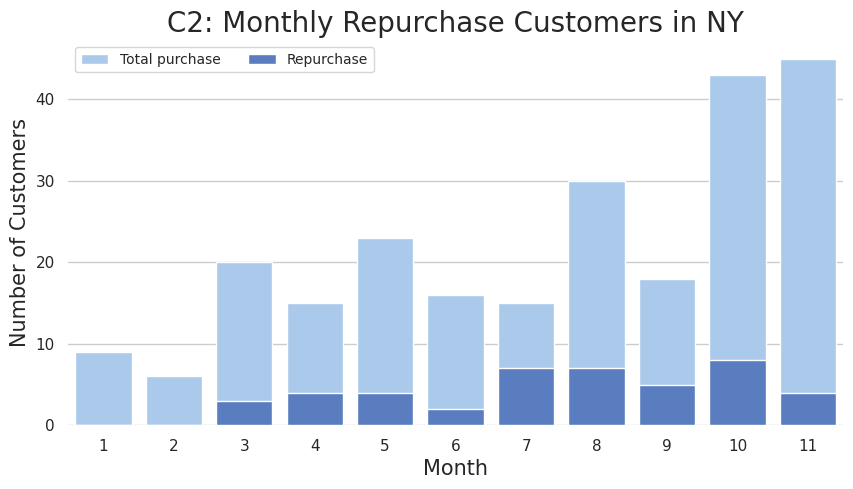

In [ ]:
newyork_repurchase['기준연월'] = [i for i in range(1, 12)]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')

sns.barplot(x='기준연월',
            y='Total',
            data=newyork_repurchase,
            label='Total purchase',
            color='b')

sns.set_color_codes('muted')
sns.barplot(x='기준연월',
            y='Y',
            data=newyork_repurchase,
            label='Repurchase',
            color='b')

axes.set_title("C2: Monthly Repurchase Customers in NY", fontsize='20')
axes.set_xlabel('Month', fontsize='15')
axes.set_ylabel('Number of Customers', fontsize='15')
axes.legend(ncol=2, frameon=True, fontsize=10)
sns.despine(left=True, bottom=True)

###### 분석 정리

- 내달에도 재구매한 비율 3순위: 8월 47% 10월 28% 5월 27%
- 타 지역 대비 재구매율 수치가 다소 산발적인 모습 확인


#### (4) 전체기간의 재구매자 비율

In [ ]:
NewYork_2_cluster = cluster_2.loc[cluster_2["고객지역"] == "New York"]

nyc_order_cnt_df = pd.pivot_table(NewYork_2_cluster,
               index= "고객ID",
               columns = "거래날짜",
               values = "거래ID",
               aggfunc = "count"
               )
nyc_order_cnt_df = nyc_order_cnt_df.fillna(0)


N = len(nyc_order_cnt_df.index)
re = []
for i in range(N):
  row = nyc_order_cnt_df.iloc[i]
  r = row.values
  cnt = 0
  for num in r:
    if cnt >= 2 :
      break
    elif num >= 1 :
      cnt += 1
    elif num == 0:
      continue

  if cnt == 2:
    cnt = 1
    re.append(cnt)
  elif cnt == 1:
    cnt = 0
    re.append(cnt)

ny_2_re_ratio = sum(re) /N * 100
print("new york 재구매율 : ", round(ny_2_re_ratio, 2))

new york 재구매율 :  64.84


###### 시각화

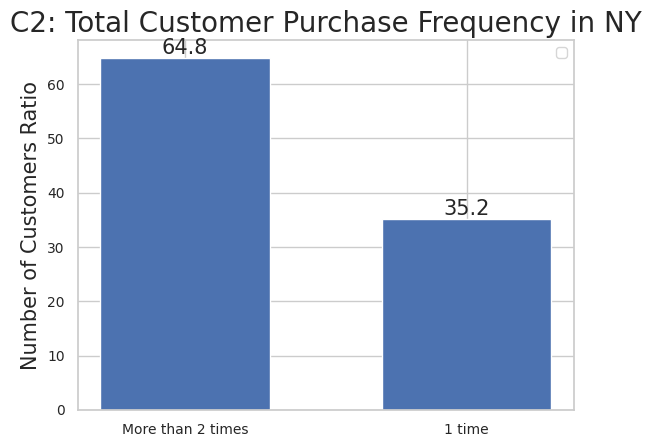

In [ ]:
x = ["More than 2 times", "1 time"]
y = [ny_2_re_ratio, 100- ny_2_re_ratio]
bar = plt.bar(x,y,width=0.6)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 15)

plt.title("C2: Total Customer Purchase Frequency in NY", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Customers Ratio', fontsize=15)
plt.legend("", fontsize=10)

plt.show()


###### 분석 정리

- 1년간 2번 이상 구매한 고객 비율: 64.8%

### 1-4-2. 선호 품목

##### 주문수량 기준

In [ ]:
ny_categ_quant_top5_index = NewYork_2_cluster.groupby("제품카테고리")["수량"].sum().sort_values(ascending = False).index[:5]
ny_categ_quant_top5_df = NewYork_2_cluster[NewYork_2_cluster["제품카테고리"].isin(ny_categ_quant_top5_index)]

ny_categ_quant_top5_pt = pd.pivot_table(
    ny_categ_quant_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "수량",
    aggfunc = "sum"
)
ny_categ_quant_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,34,20,32,64,415
2019-02,33,3,7,45,56
2019-03,402,198,199,125,1248
2019-04,204,161,110,71,434
2019-05,243,335,256,178,595
2019-06,332,359,69,139,1524
2019-07,230,38,18,102,248
2019-08,484,347,176,143,1049
2019-09,316,40,133,132,560


###### 시각화

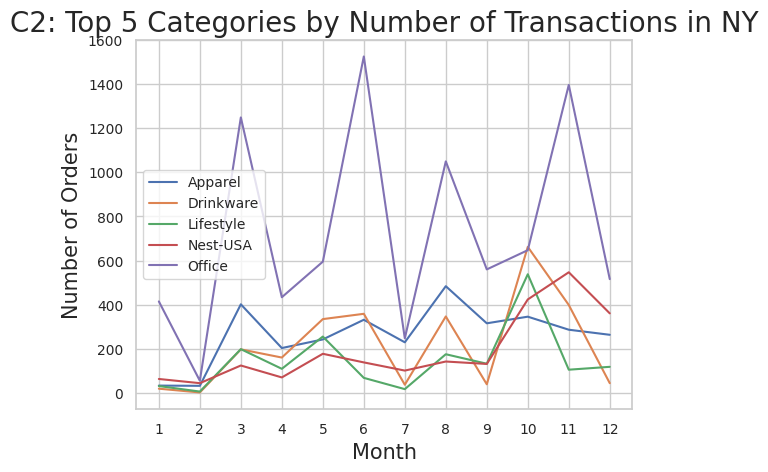

In [ ]:
for col in ny_categ_quant_top5_pt.columns:
  plt.plot([i for i in range(1,13)], ny_categ_quant_top5_pt[col], label = col)

plt.title("C2: Top 5 Categories by Number of Transactions in NY", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1,13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

###### 분석 정리

- 상위 카테고리 5개 중에서 전체 기간 통틀어 Office의 주문수량이 월등히 높았으며, 3월 6월 8월 11월에 유난히 치솟는 특이한 모습 확인
- 기타 카테고리의 경우 유사한 수준 유지


##### 주문횟수 기준

In [ ]:
ny_categ_ordercnt_top5_index = NewYork_2_cluster.groupby("제품카테고리")["거래ID"].count().sort_values(ascending=False).index[:5]
ny_categ_ordercnt_top5_df = NewYork_2_cluster[NewYork_2_cluster["제품카테고리"].isin(ny_categ_ordercnt_top5_index)]

ny_categ_ordercnt_top5_pt = pd.pivot_table(
    ny_categ_ordercnt_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "거래ID",
    aggfunc = "count"
).fillna(0)
ny_categ_ordercnt_top5_pt

제품카테고리,Apparel,Drinkware,Nest,Nest-USA,Office
기준연월,,,,,
2019-01,21.0,5.0,0.0,52.0,27.0
2019-02,31.0,3.0,0.0,38.0,15.0
2019-03,126.0,18.0,0.0,73.0,75.0
2019-04,105.0,21.0,0.0,51.0,35.0
2019-05,201.0,39.0,0.0,112.0,63.0
2019-06,98.0,14.0,0.0,91.0,31.0
2019-07,125.0,13.0,0.0,71.0,22.0
2019-08,363.0,43.0,10.0,96.0,67.0
2019-09,146.0,18.0,34.0,92.0,42.0


###### 시각화

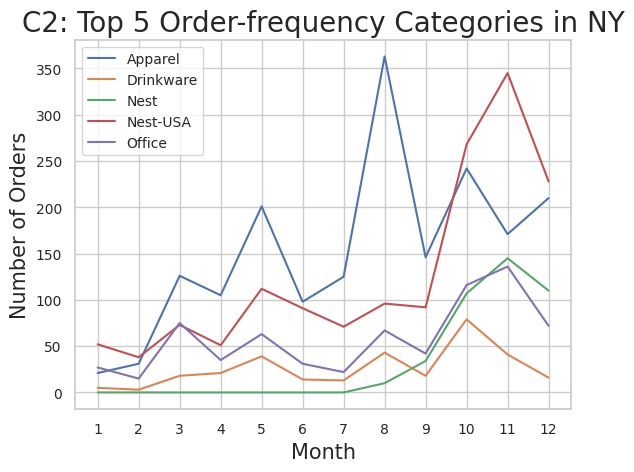

In [ ]:
for col in ny_categ_ordercnt_top5_pt.columns:
  plt.plot([i for i in range(1, 13)], ny_categ_ordercnt_top5_pt[col], label=col)

plt.title("C2: Top 5 Order-frequency Categories in NY", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1, 13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

###### 분석 정리

- nest의 8월 런칭 사실 재확인하였으며, 연말까지 상승 추이 기록
- 유난히 주문 수량이 높았던 office는 낮은 주문 횟수를 기록하여 office의 한번에 다량구매 특성 또한 재확인
- 타 지역과 마찬가지로 apparel, nest-usa의 주문횟수가 주문수량 대비 눈에 띄게 상승 기록
- apparel은 8월에 급증, nest-usa는 11월에 급증하는 모습


### 1-4-3. 카테고리별 쿠폰 사용

###### 시각화

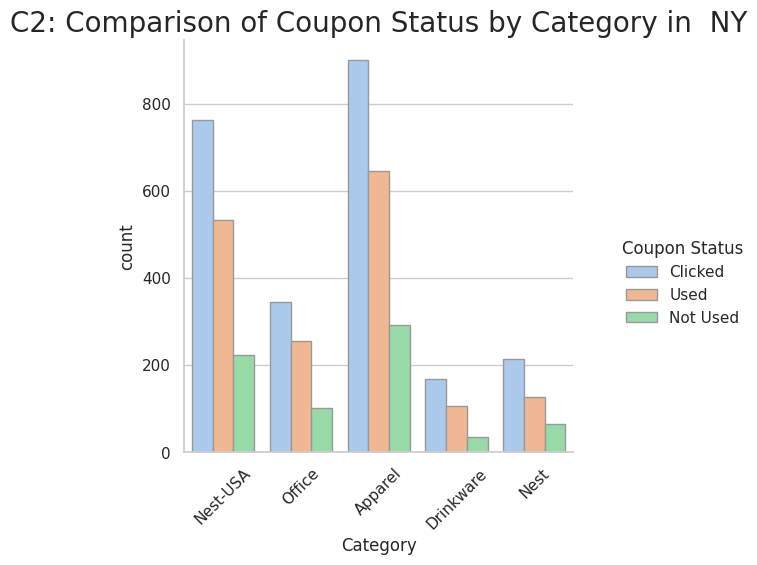

In [ ]:
g = sns.catplot(x='제품카테고리', hue='쿠폰상태', kind ='count', palette='pastel', edgecolor=".6",data=ny_categ_ordercnt_top5_df);

mpl.rcParams['axes.titlesize']  = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
g._legend.set_title('Coupon Status')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.title('C2: Comparison of Coupon Status by Category in  NY')
plt.show()

###### 분석 정리

- apparel, nest-usa의 높은 쿠폰 관심도 확인

## 1-5. 워싱턴 DC

### 1-5-1. 월별 구매 분석

#### (1) 월별 전체 구매율 비교

In [ ]:
wdc_2_purchase_amt = cluster_2_total_price[cluster_2_total_price["고객지역"]=="Washington DC"].groupby("고객지역")["소비자총부담가격"].agg([
    ("전체 구매금액" , sum)
])

l = []
for i in range(1, cluster_2_total_price["월"].nunique() + 1 ):
  month = cluster_2_total_price[cluster_2_total_price["월"] == i ]

  r1 = month[month["고객지역"] == "Washington DC"]
  r1_s = r1["소비자총부담가격"].sum()
  l.append(r1_s)

  wdc_2_purchase_amt[f"{i}"] = l
  l = []

In [ ]:
wdc_2_purchase_amt

,전체 구매금액,1,2,3,4,5,6,7,8,9,10,11,12
고객지역,,,,,,,,,,,,,
Washington DC,167837.3618,12621.3168,13460.406,7366.9142,5238.1464,1548.1042,8150.2243,9511.5769,11895.7169,23980.3978,22890.0637,30236.298,20938.1966


In [ ]:
wdc_2_purchase_ratio = pd.DataFrame(index = ["Washington DC"])

for i in range(1, cluster_2_total_price["월"].nunique()+1):
  p = wdc_2_purchase_amt[f"{i}"]
  wdc_2_purchase_ratio[f"{i}"] = p / wdc_2_purchase_amt["전체 구매금액"] * 100

In [ ]:
wdc_2_purchase_ratio

,1,2,3,4,5,6,7,8,9,10,11,12
Washington DC,7.519969,8.01991,4.389317,3.120966,0.922384,4.856025,5.667139,7.087645,14.287878,13.638241,18.015237,12.475289


###### 시각화

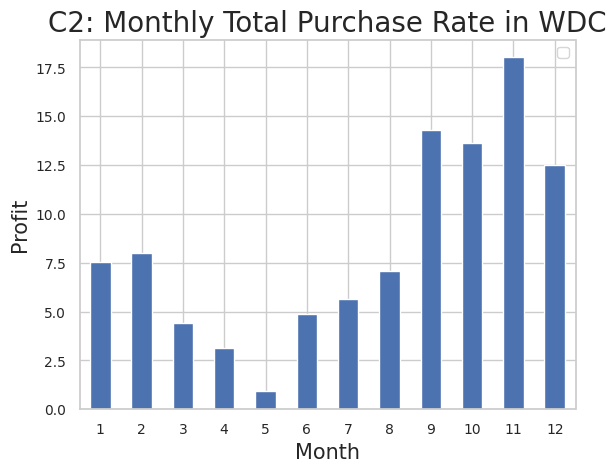

In [ ]:
wdc_2_purchase_ratio.T.plot.bar()

plt.title("C2: Monthly Total Purchase Rate in WDC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

###### 분석 정리

#### (2) 주문횟수로 본 월별 구매율

###### 시각화

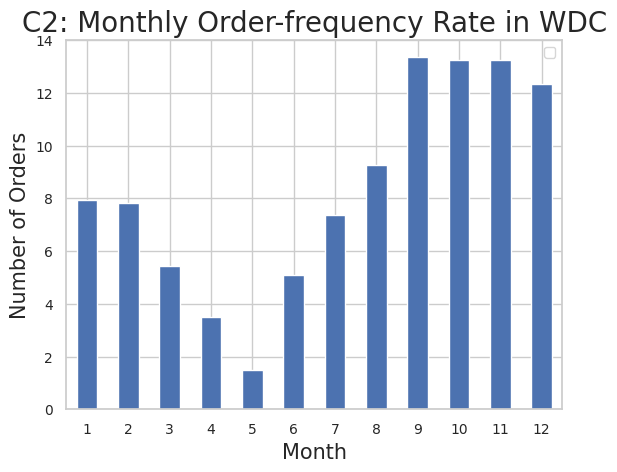

In [ ]:
def WashingtonDC_2_cluster_order(x):
  mask = WashingtonDC_2_cluster['월'] == x
  data = WashingtonDC_2_cluster[mask]['거래ID'].nunique() / WashingtonDC_2_cluster['거래ID'].nunique() * 100
  return round(data, 2)

WashingtonDC_2_cluster_order_all = [WashingtonDC_2_cluster_order(month) for month in range(1, 13)]
WashingtonDC_2_cluster_order_all_df = pd.DataFrame(WashingtonDC_2_cluster_order_all, index=(i for i in range(1,13)))
WashingtonDC_2_cluster_order_all_df.transpose().T.plot.bar()


plt.title("C2: Monthly Order-frequency Rate in WDC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

###### 분석 정리

- 주문수량과 횟수 모두 대체적으로 5월을 기점으로 연초부터 하락
- 다시 5월 이후 상승하고 연말에 최고점 기록

#### (3) 한달 내 재구매율

In [ ]:
wdc_re = WashingtonDC_2_cluster[["기준연월", "고객ID"]].drop_duplicates(keep="first")

In [ ]:
loop_list = list(wdc_re['기준연월'].unique())
washdc_cluster_2_re_all = []

for i in loop_list:
  c2_left = wdc_re[wdc_re['기준연월'] == i]
  bsym_2m = (pd.to_datetime(i) + pd.DateOffset(months=1)).strftime('%Y-%m')
  c2_right = pd.DataFrame(wdc_re[wdc_re['기준연월'] == bsym_2m]['고객ID'].unique())
  c2_right['target'] = 1
  c2_right.columns= ['고객ID', 'target']
  c2_merge = pd.merge(c2_left, c2_right, how='left')
  c2_merge['target'] = c2_merge['target'].fillna(0)
  washdc_cluster_2_re_all.append(c2_merge)

washdc_cluster_2_re_all = pd.concat(washdc_cluster_2_re_all)

In [ ]:
washdc_repurchase = washdc_cluster_2_re_all.groupby('기준연월')['target'].agg(['sum', 'count']).reset_index()
washdc_repurchase.columns = ['기준연월', 'Y', 'Total']
washdc_repurchase['ratio'] = washdc_repurchase['Y']/washdc_repurchase['Total']
washdc_repurchase = washdc_repurchase.iloc[0:11, :]
round(washdc_repurchase, 2)

,기준연월,Y,Total,ratio
0,2019-01,0.0,4,0.00
1,2019-02,2.0,7,0.29
2,2019-03,1.0,6,0.17
3,2019-04,0.0,4,0.00
4,2019-05,0.0,2,0.00
5,2019-06,5.0,8,0.62
6,2019-07,4.0,10,0.40
7,2019-08,3.0,11,0.27
8,2019-09,4.0,10,0.40
9,2019-10,3.0,17,0.18


###### 시각화

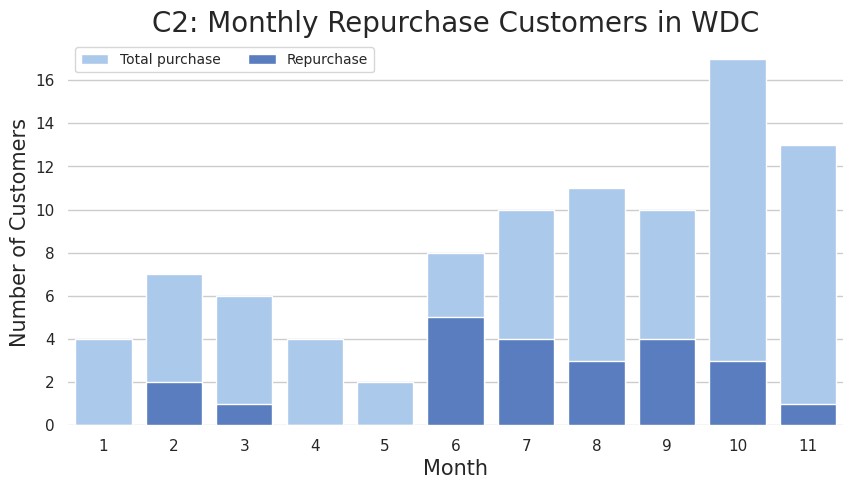

In [ ]:
washdc_repurchase['기준연월'] = [i for i in range(1, 12)]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')

sns.barplot(x='기준연월',
            y='Total',
            data=washdc_repurchase,
            label='Total purchase',
            color='b')

sns.set_color_codes('muted')
sns.barplot(x='기준연월',
            y='Y',
            data=washdc_repurchase,
            label='Repurchase',
            color='b')

axes.set_title("C2: Monthly Repurchase Customers in WDC", fontsize='20')
axes.set_xlabel('Month', fontsize='15')
axes.set_ylabel('Number of Customers', fontsize='15')
axes.legend(ncol=2, frameon=True, fontsize=10)
sns.despine(left=True, bottom=True)

###### 분석 정리

- 내달에도 재구매한 비율 3순위: 7월 62% 8월/10월 40% 3월 29%
- 대체적으로 여름 시즌에 재구매율 상승


#### (4) 전체기간의 재구매자 비율

In [ ]:
WashingtonDC_2_cluster = cluster_2.loc[cluster_2["고객지역"] == "Washington DC"]

wdc_order_cnt_df = pd.pivot_table(WashingtonDC_2_cluster,
               index= "고객ID",
               columns = "거래날짜",
               values = "거래ID",
               aggfunc = "count"
               )
wdc_order_cnt_df = wdc_order_cnt_df.fillna(0)


N = len(wdc_order_cnt_df.index)
re = []
for i in range(N):
  row = wdc_order_cnt_df.iloc[i]
  r = row.values
  cnt = 0
  for num in r:
    if cnt >= 2 :
      break
    elif num >= 1 :
      cnt += 1
    elif num == 0:
      continue

  if cnt == 2:
    cnt = 1
    re.append(cnt)
  elif cnt == 1:
    cnt = 0
    re.append(cnt)

wdc_2_re_ratio = sum(re) /N * 100
print("Washington DC 재구매율 : ", round(wdc_2_re_ratio, 2))

Washington DC 재구매율 :  66.67


###### 시각화

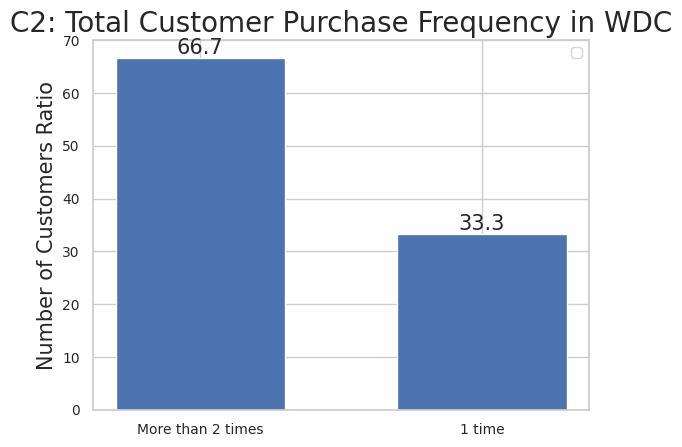

In [ ]:
x = ["More than 2 times", "1 time"]
y = [wdc_2_re_ratio, 100- wdc_2_re_ratio]
bar = plt.bar(x,y,width=0.6)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 15)

plt.title("C2: Total Customer Purchase Frequency in WDC", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Customers Ratio', fontsize=15)
plt.legend("", fontsize=10)

plt.show()


###### 분석 정리

- 1년간 2회 이상 구매한 고객 비율: 66.7%

### 1-5-2. 선호 품목

##### 주문수량 기준

In [ ]:
wdc_categ_quant_top5_index = WashingtonDC_2_cluster.groupby("제품카테고리")["수량"].sum().sort_values(ascending = False).index[:5]

wdc_categ_quant_top5_df = WashingtonDC_2_cluster[WashingtonDC_2_cluster["제품카테고리"].isin(wdc_categ_quant_top5_index)]

wdc_categ_quant_top5_pt = pd.pivot_table(
    wdc_categ_quant_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "수량",
    aggfunc = "sum"
)
wdc_categ_quant_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,16.0,11.0,24.0,76.0,476.0
2019-02,47.0,32.0,77.0,73.0,314.0
2019-03,48.0,94.0,122.0,31.0,150.0
2019-04,18.0,NaN,4.0,27.0,20.0
2019-05,25.0,1.0,5.0,6.0,3.0
2019-06,45.0,39.0,7.0,34.0,122.0
2019-07,64.0,54.0,206.0,49.0,9.0
2019-08,160.0,23.0,24.0,56.0,109.0
2019-09,245.0,87.0,320.0,93.0,355.0


###### 시각화

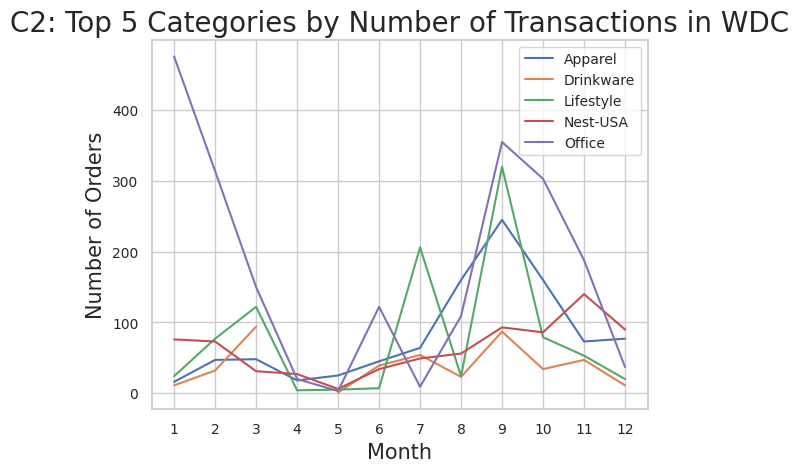

In [ ]:
for col in wdc_categ_quant_top5_pt.columns:
  plt.plot([i for i in range(1,13)], wdc_categ_quant_top5_pt[col], label = col)

plt.title("C2: Top 5 Categories by Number of Transactions in WDC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1,13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

###### 분석 정리

- office가 1월과 9월에 유난히 급증하는 모습
- 평균적으로 봄철(4-5월)이 비수기, 여름 이후 성수기로 분석
- 9월에 office 뿐만 아니라 lifestyle, apparel 또한 높은 주문 수량을 기록


##### 주문횟수 기준

In [ ]:
wdc_categ_ordercnt_top5_index = WashingtonDC_2_cluster.groupby("제품카테고리")["거래ID"].count().sort_values(ascending=False).index[:5]

wdc_categ_ordercnt_top5_df = WashingtonDC_2_cluster[WashingtonDC_2_cluster["제품카테고리"].isin(wdc_categ_ordercnt_top5_index)]

wdc_categ_ordercnt_top5_pt = pd.pivot_table(
    wdc_categ_ordercnt_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "거래ID",
    aggfunc = "count"
).fillna(0)
wdc_categ_ordercnt_top5_pt

제품카테고리,Apparel,Lifestyle,Nest,Nest-USA,Office
기준연월,,,,,
2019-01,14.0,12.0,0.0,49.0,21.0
2019-02,38.0,8.0,0.0,46.0,21.0
2019-03,32.0,10.0,0.0,22.0,11.0
2019-04,17.0,2.0,0.0,19.0,7.0
2019-05,20.0,3.0,0.0,2.0,3.0
2019-06,36.0,6.0,0.0,22.0,11.0
2019-07,54.0,6.0,0.0,36.0,9.0
2019-08,91.0,13.0,3.0,36.0,8.0
2019-09,68.0,20.0,19.0,54.0,24.0


###### 시각화

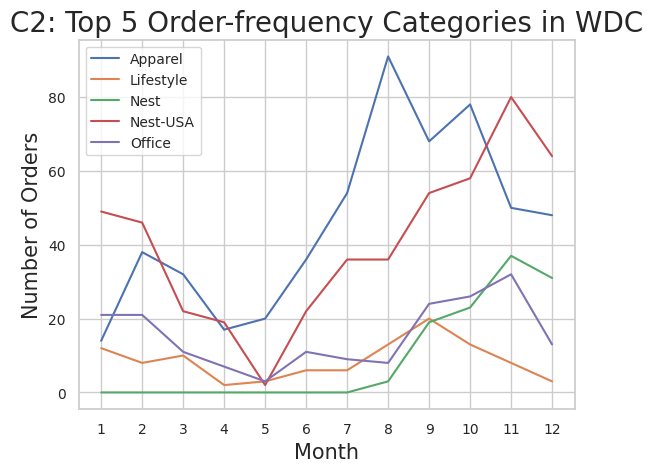

In [ ]:
for col in wdc_categ_ordercnt_top5_pt.columns:
  plt.plot([i for i in range(1, 13)], wdc_categ_ordercnt_top5_pt[col], label=col)

plt.title("C2: Top 5 Order-frequency Categories in WDC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1, 13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

###### 분석 정리

- 주문수량과 완전히 다른 형태를 보이며, 카테고리간 높은 격차 확인
- apparel, nest-usa의 높은 주문횟수
- 주문수량이 많았던 office는 주문횟수가 낮아서 한번에 다량 구매 재확인
- nest 품목의 8월 런칭 재확인

##### 주문금액 기준

###### 시각화

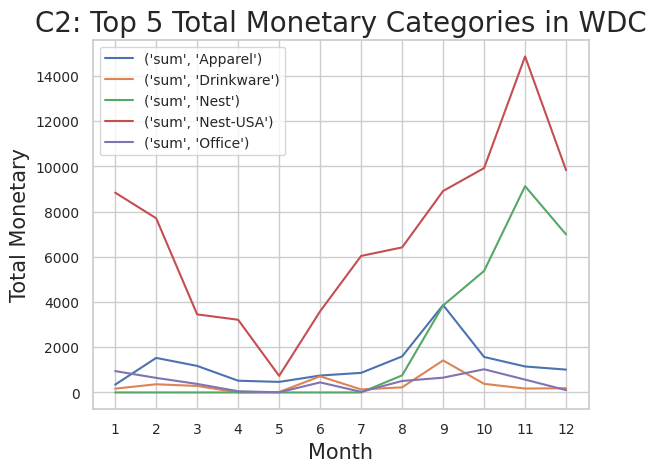

In [ ]:
wdc_categ_monetary_top5_index = WashingtonDC_2_cluster.groupby("제품카테고리")["monetary"].sum().sort_values(ascending=False).index[:5]
wdc_categ_monetary_top5_df = WashingtonDC_2_cluster[WashingtonDC_2_cluster["제품카테고리"].isin(wdc_categ_monetary_top5_index)]

wdc_categ_monetary_top5_pt = pd.pivot_table(
    wdc_categ_monetary_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "monetary",
    aggfunc = [np.sum]
).fillna(0)
wdc_categ_monetary_top5_pt

for col in wdc_categ_monetary_top5_pt.columns:
  plt.plot([i for i in range(1, 13)], wdc_categ_monetary_top5_pt[col], label=col)

plt.title("C2: Top 5 Total Monetary Categories in WDC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Total Monetary", fontsize=15)
plt.xticks([i for i in range(1, 13)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

### 1-5-3. 카테고리별 쿠폰 사용

###### 시각화

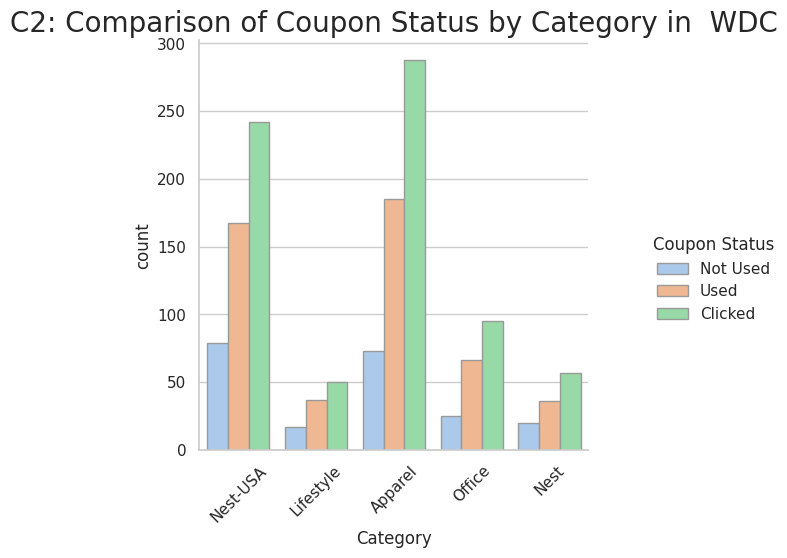

In [ ]:
g = sns.catplot(x='제품카테고리', hue='쿠폰상태', kind ='count', palette='pastel', edgecolor=".6",data=wdc_categ_ordercnt_top5_df);

mpl.rcParams['axes.titlesize']  = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
g._legend.set_title('Coupon Status')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.title('C2: Comparison of Coupon Status by Category in  WDC')
plt.show()

###### 분석 정리

- apparel, nest-usa의 높은 쿠폰 관심도

## 1-6. 지역별 비교

In [ ]:
region_list = ['Chicago', 'California', 'New Jersey', 'New York', 'Washington DC']

### 1-6-1. 월별 구매 분석
- 지역별 월간 구매 금액 비교

In [ ]:
cluster_2_purchase_amt = pd.concat([chic_2_purchase_amt.drop('전체 구매금액', axis=1), cali_2_purchase_amt.drop('전체 구매금액', axis=1), nj_2_purchase_amt.drop('전체 구매금액', axis=1), ny_2_purchase_amt.drop('전체 구매금액', axis=1), wdc_2_purchase_amt.drop('전체 구매금액', axis=1) ])

In [ ]:
cluster_2_purchase_amt

,1,2,3,4,5,6,7,8,9,10,11,12
고객지역,,,,,,,,,,,,
Chicago,24587.2867,40035.4273,36126.7024,26632.7855,36272.6634,45680.2916,51417.7246,84904.7425,76149.4963,137980.3537,183022.1703,165459.4393
California,42535.6123,30005.7273,25232.2788,49662.7574,24182.5599,46653.2845,56052.8762,41966.5092,84370.9843,116525.9719,141967.4386,143877.5802
New Jersey,10547.8954,15496.5691,3578.5064,25690.1759,14364.8977,11930.6382,12507.7405,4191.8824,6326.9074,44708.9216,45628.3823,48645.6857
New York,16030.8029,7982.2385,41952.8888,20445.5472,38130.5493,28106.5459,20428.2369,40104.3894,33160.2294,108905.0024,120117.7126,78156.1392
Washington DC,12621.3168,13460.4060,7366.9142,5238.1464,1548.1042,8150.2243,9511.5769,11895.7169,23980.3978,22890.0637,30236.2980,20938.1966


In [ ]:
cluster_2_purchase_amt_all = pd.concat([chic_2_purchase_amt.loc[:, '전체 구매금액'], cali_2_purchase_amt.loc[:, '전체 구매금액'], nj_2_purchase_amt.loc[:, '전체 구매금액'], ny_2_purchase_amt.loc[:, '전체 구매금액'], wdc_2_purchase_amt.loc[:, '전체 구매금액']])
round(cluster_2_purchase_amt_all, 2).sort_values(ascending=False).to_frame()

,전체 구매금액
고객지역,
Chicago,908269.08
California,803033.58
New York,553520.28
New Jersey,243618.20
Washington DC,167837.36


###### 시각화

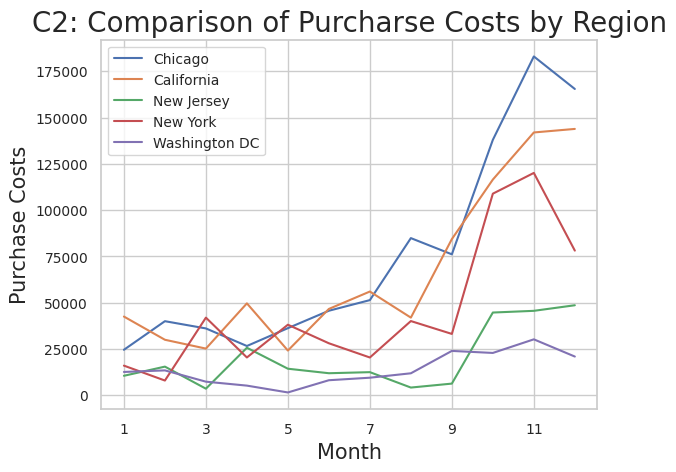

In [ ]:
cluster_2_purchase_amt.T.plot()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Purchase Costs", fontsize=15)
plt.legend(fontsize=10)
plt.title('C2: Comparison of Purcharse Costs by Region', fontsize=20)
plt.show()

###### 분석 정리

- 일반적으로 7월부터 연말까지 전체 구매 금액이 치솟는 행 확인
- 구매 금액 기준 시카고>캘리포니아>뉴욕>뉴저지>워싱턴DC 순으로 지역 시장 규모가 큰 것으로 확인

### 1-6-2. 지역별 재구매자율 표

In [ ]:
repur_df = pd.DataFrame(
    index = ["California", "Chicago", "New Jersey", "New York", "Washington DC"],
    columns = ["재구매자 비율"]
)
repur_df = repur_df.sort_values(by = "재구매자 비율", ascending = False)
repur_df

,재구매자 비율
California,NaN
Chicago,NaN
New Jersey,NaN
New York,NaN
Washington DC,NaN


###### 분석 정리

- 1년간 2회 이상 구매한 고객 비율은 뉴저지가 가장 높고 캘리포니아가 가장 낮은 모습


### 1-6-3. 구매율과 배송료 관계
- 구매율 비교 기준: 전지역 거래횟수 합에서 각 지역별 거래횟수의 비율
- 배송료 비교 기준: 전지역 배송료 합에서 각 지역별 배송료의 비율

In [ ]:
def c2_region_order(x):
  mask = cluster_2['고객지역'] == x
  data = cluster_2[mask]['거래ID'].nunique() / cluster_2['거래ID'].nunique() * 100
  return round(data, 2)
c2_region_order_ratio = [c2_region_order(region) for region in region_list]

def c2_region_delivery(x):
  mask = cluster_2_total_price['고객지역'] == x
  data = cluster_2_total_price[mask]['배송료'].sum() / cluster_2_total_price['배송료'].sum() * 100
  return round(data, 2)

c2_region_delivery_ratio = [c2_region_delivery(region) for region in region_list]

c2_order_delivery_df = pd.DataFrame({
    '고객지역': region_list,
    '거래횟수': c2_region_order_ratio,
    '배송료': c2_region_delivery_ratio
})
c2_order_delivery_df

,고객지역,거래횟수,배송료
0,Chicago,35.69,34.37
1,California,29.45,28.86
2,New Jersey,8.71,8.49
3,New York,22.07,21.56
4,Washington DC,6.76,6.72


###### 시각화

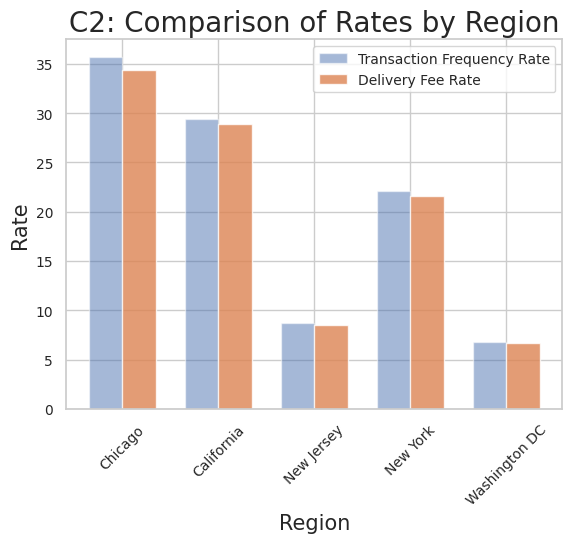

In [ ]:
xlabel = region_list
x = np.arange(len(xlabel))
y1 = c2_region_order_ratio
y2 = c2_region_delivery_ratio

width = 0.35

fig, axes = plt.subplots()
axes.bar(x - width/2, y1, width, align='center', alpha=0.5)
axes.bar(x + width/2, y2, width, align='center', alpha=0.8)

plt.xticks(x, fontsize=10, rotation=45)
plt.yticks(fontsize=10)
axes.set_xticklabels(xlabel, fontsize=10)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Rate", fontsize=15)
plt.legend(["Transaction Frequency Rate","Delivery Fee Rate"], fontsize=10)
plt.title('C2: Comparison of Rates by Region', fontsize=20)
plt.show()

###### 분석 정리

- 지역에 따라 거래횟수와 배송료 비율을 비교하였을 때, 각 지역별로 차지하는 비중이 거래횟수의 경우 시카고가 가장 높고 워싱턴이 가장 낮았으며, 배송료 또한 같은 모습
- 지역별 전체 구매금액과 같은 순위를 보여, 지역 시장의 크기는 시카고>캘리>뉴욕>뉴저지>워싱턴DC 순임을 재확인
